In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set_theme()

In [2]:
df = pd.read_csv('../datasets/competition_dataset/dev.tsv', sep='\t')

df = df.drop_duplicates()

df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85028 entries, 0 to 120738
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      85025 non-null  object 
 1   description  85028 non-null  object 
 2   designation  59084 non-null  object 
 3   province     85025 non-null  object 
 4   region_1     71139 non-null  object 
 5   region_2     34294 non-null  object 
 6   variety      85028 non-null  object 
 7   winery       85028 non-null  object 
 8   quality      85028 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.5+ MB


In [4]:
df[df.country.isna()]

,country,description,designation,province,region_1,region_2,variety,winery,quality
28353,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
88206,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,NaN,NaN,NaN,Assyrtiko,Tsililis,38.0
92096,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,NaN,NaN,NaN,Red Blend,Büyülübağ,49.0


# Exploratory data analysis

## Country

In [5]:
df.iloc[0].country

'France'

In [6]:
df.country.isnull().sum()

3

In [7]:
df[df.country.isnull()]

,country,description,designation,province,region_1,region_2,variety,winery,quality
28353,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
88206,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,NaN,NaN,NaN,Assyrtiko,Tsililis,38.0
92096,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,NaN,NaN,NaN,Red Blend,Büyülübağ,49.0


In [8]:
df.country.unique().size

49

In [9]:
df.groupby(by='country').quality.median().sort_values(ascending=False)

country
US-France                 59.0
England                   56.0
Luxembourg                53.0
France                    49.0
US                        49.0
Canada                    49.0
Hungary                   49.0
Switzerland               48.0
Mexico                    47.0
Italy                     47.0
Austria                   47.0
Israel                    47.0
Germany                   46.0
Japan                     46.0
Slovenia                  46.0
Serbia                    44.0
Lebanon                   44.0
Egypt                     42.0
Croatia                   42.0
Australia                 42.0
Uruguay                   42.0
Albania                   42.0
Tunisia                   42.0
Portugal                  42.0
New Zealand               42.0
Greece                    40.0
Turkey                    40.0
Spain                     40.0
Morocco                   39.5
South Africa              39.0
Czech Republic            38.0
Cyprus                    38.0


<AxesSubplot:ylabel='country'>

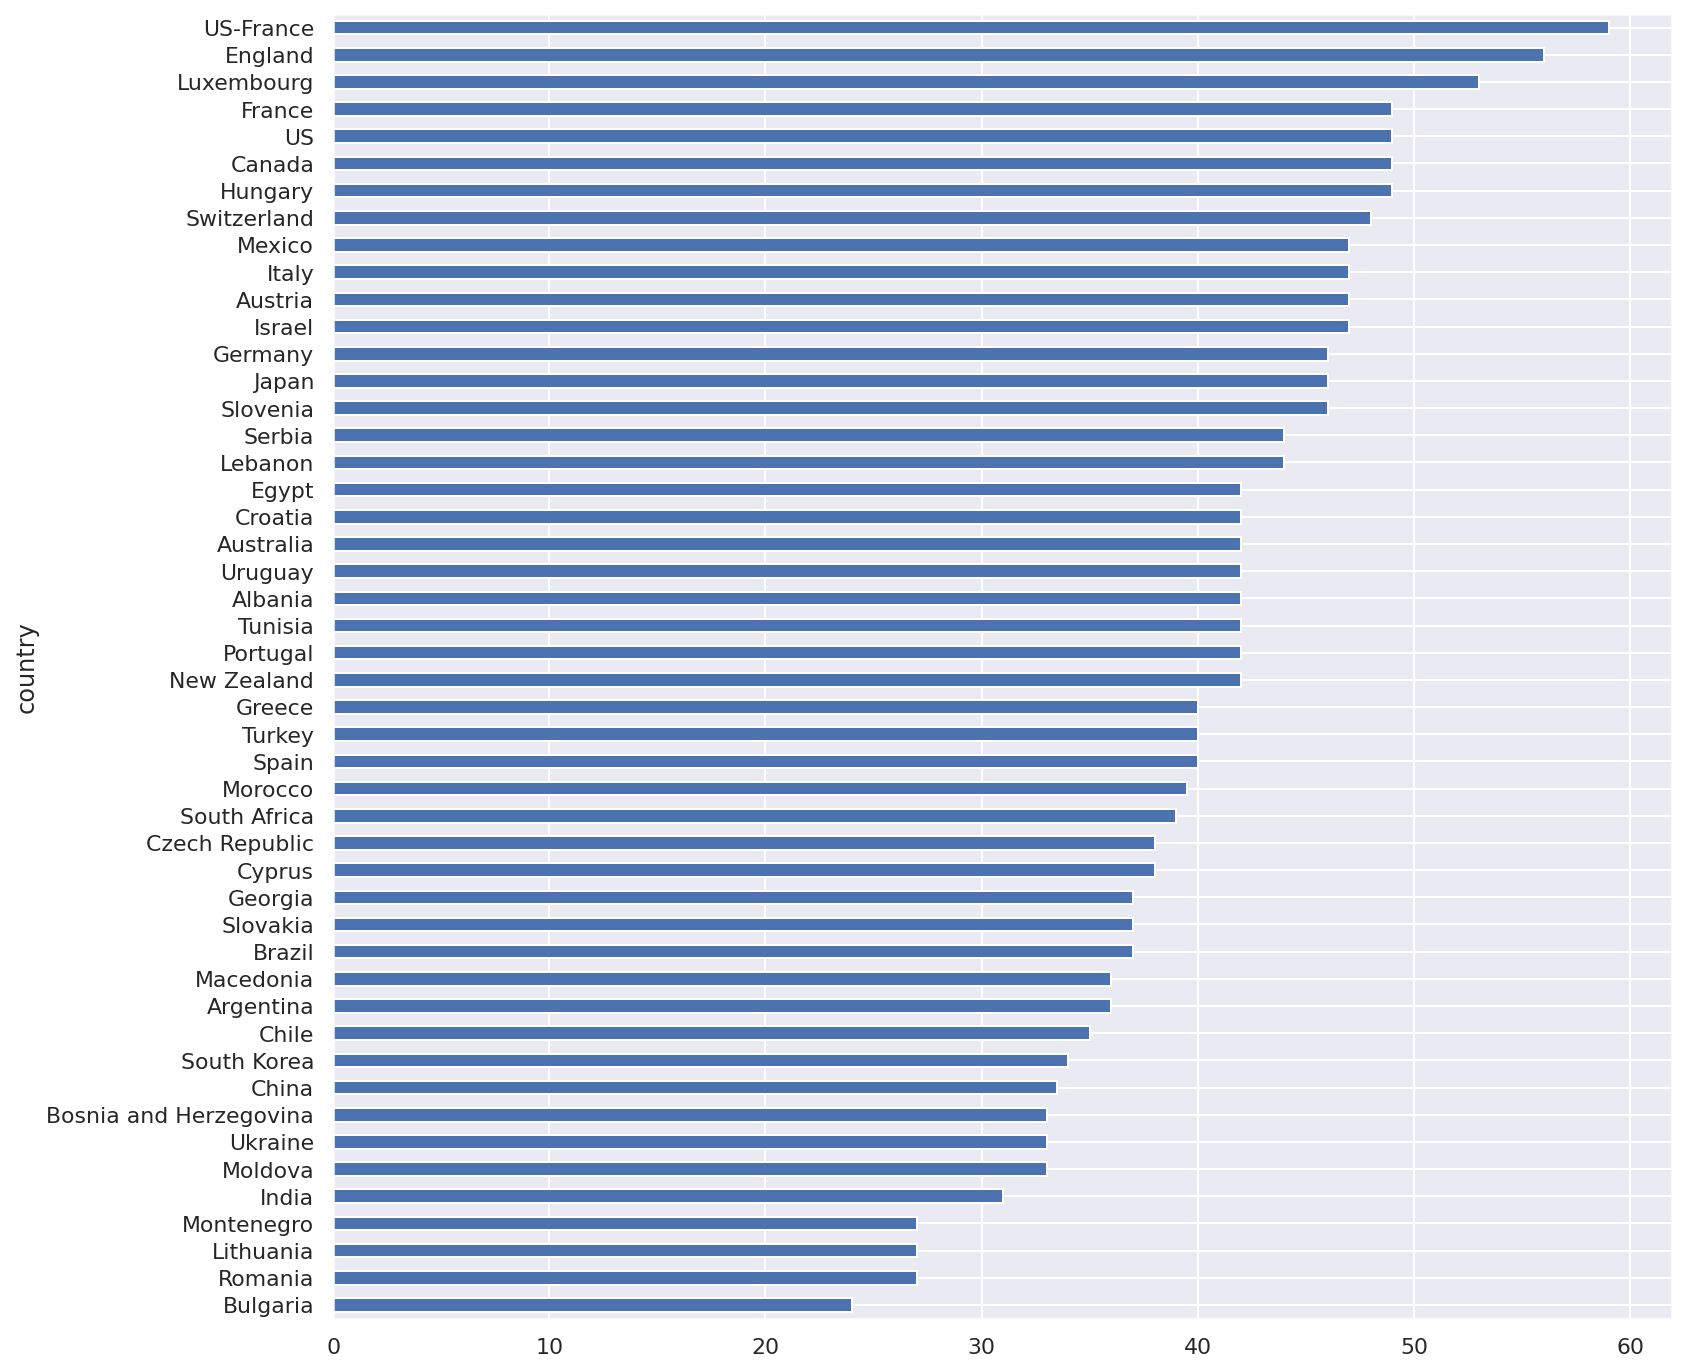

In [10]:
df.groupby(by='country').quality.median().sort_values(ascending=True).plot.barh(figsize=(12,12))

<AxesSubplot:xlabel='quality', ylabel='country'>

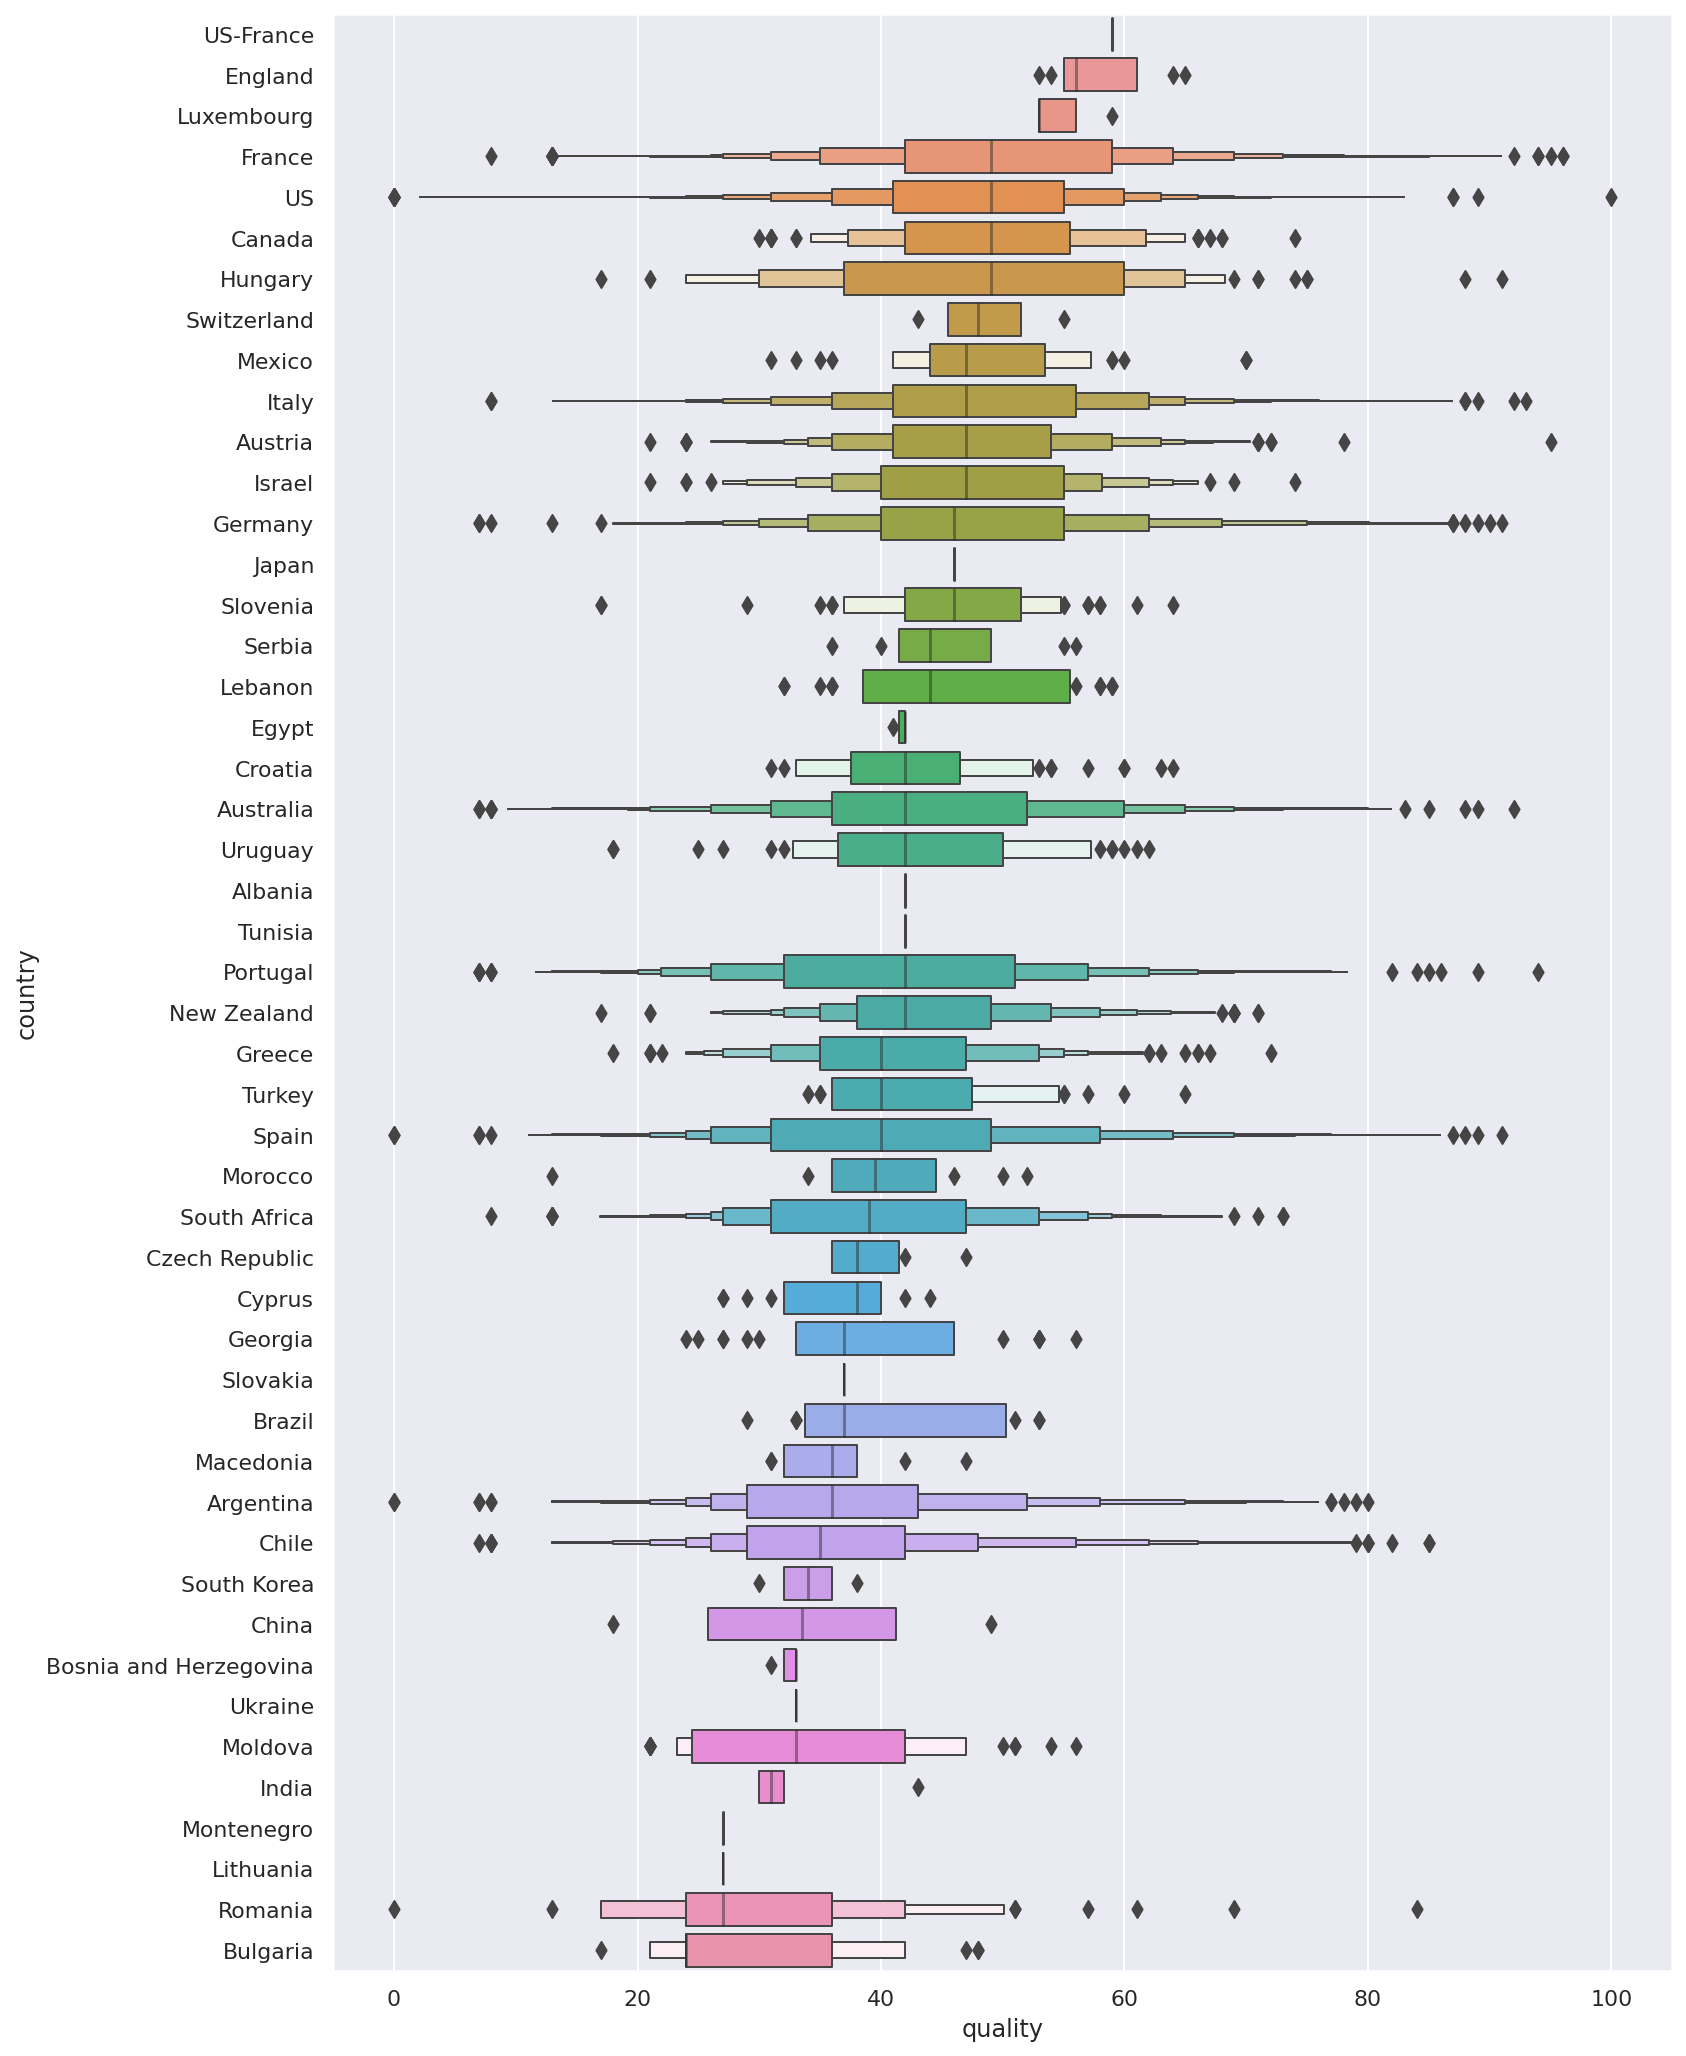

In [11]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='country').quality.median().sort_values(ascending=False).index
sns.boxenplot(ax=ax, data=df, x='quality', y='country', order=order)

In [12]:
df.country.value_counts(normalize=True).head(10)

US             0.414019
Italy          0.153625
France         0.145381
Spain          0.055395
Chile          0.038212
Argentina      0.036025
Portugal       0.035566
Australia      0.032085
Austria        0.020147
New Zealand    0.019688
Name: country, dtype: float64

In [13]:
df.country.value_counts(normalize=True).cumsum().head(10)

US             0.414019
Italy          0.567645
France         0.713026
Spain          0.768421
Chile          0.806633
Argentina      0.842658
Portugal       0.878224
Australia      0.910309
Austria        0.930456
New Zealand    0.950144
Name: country, dtype: float64

<AxesSubplot:xlabel='count', ylabel='country'>

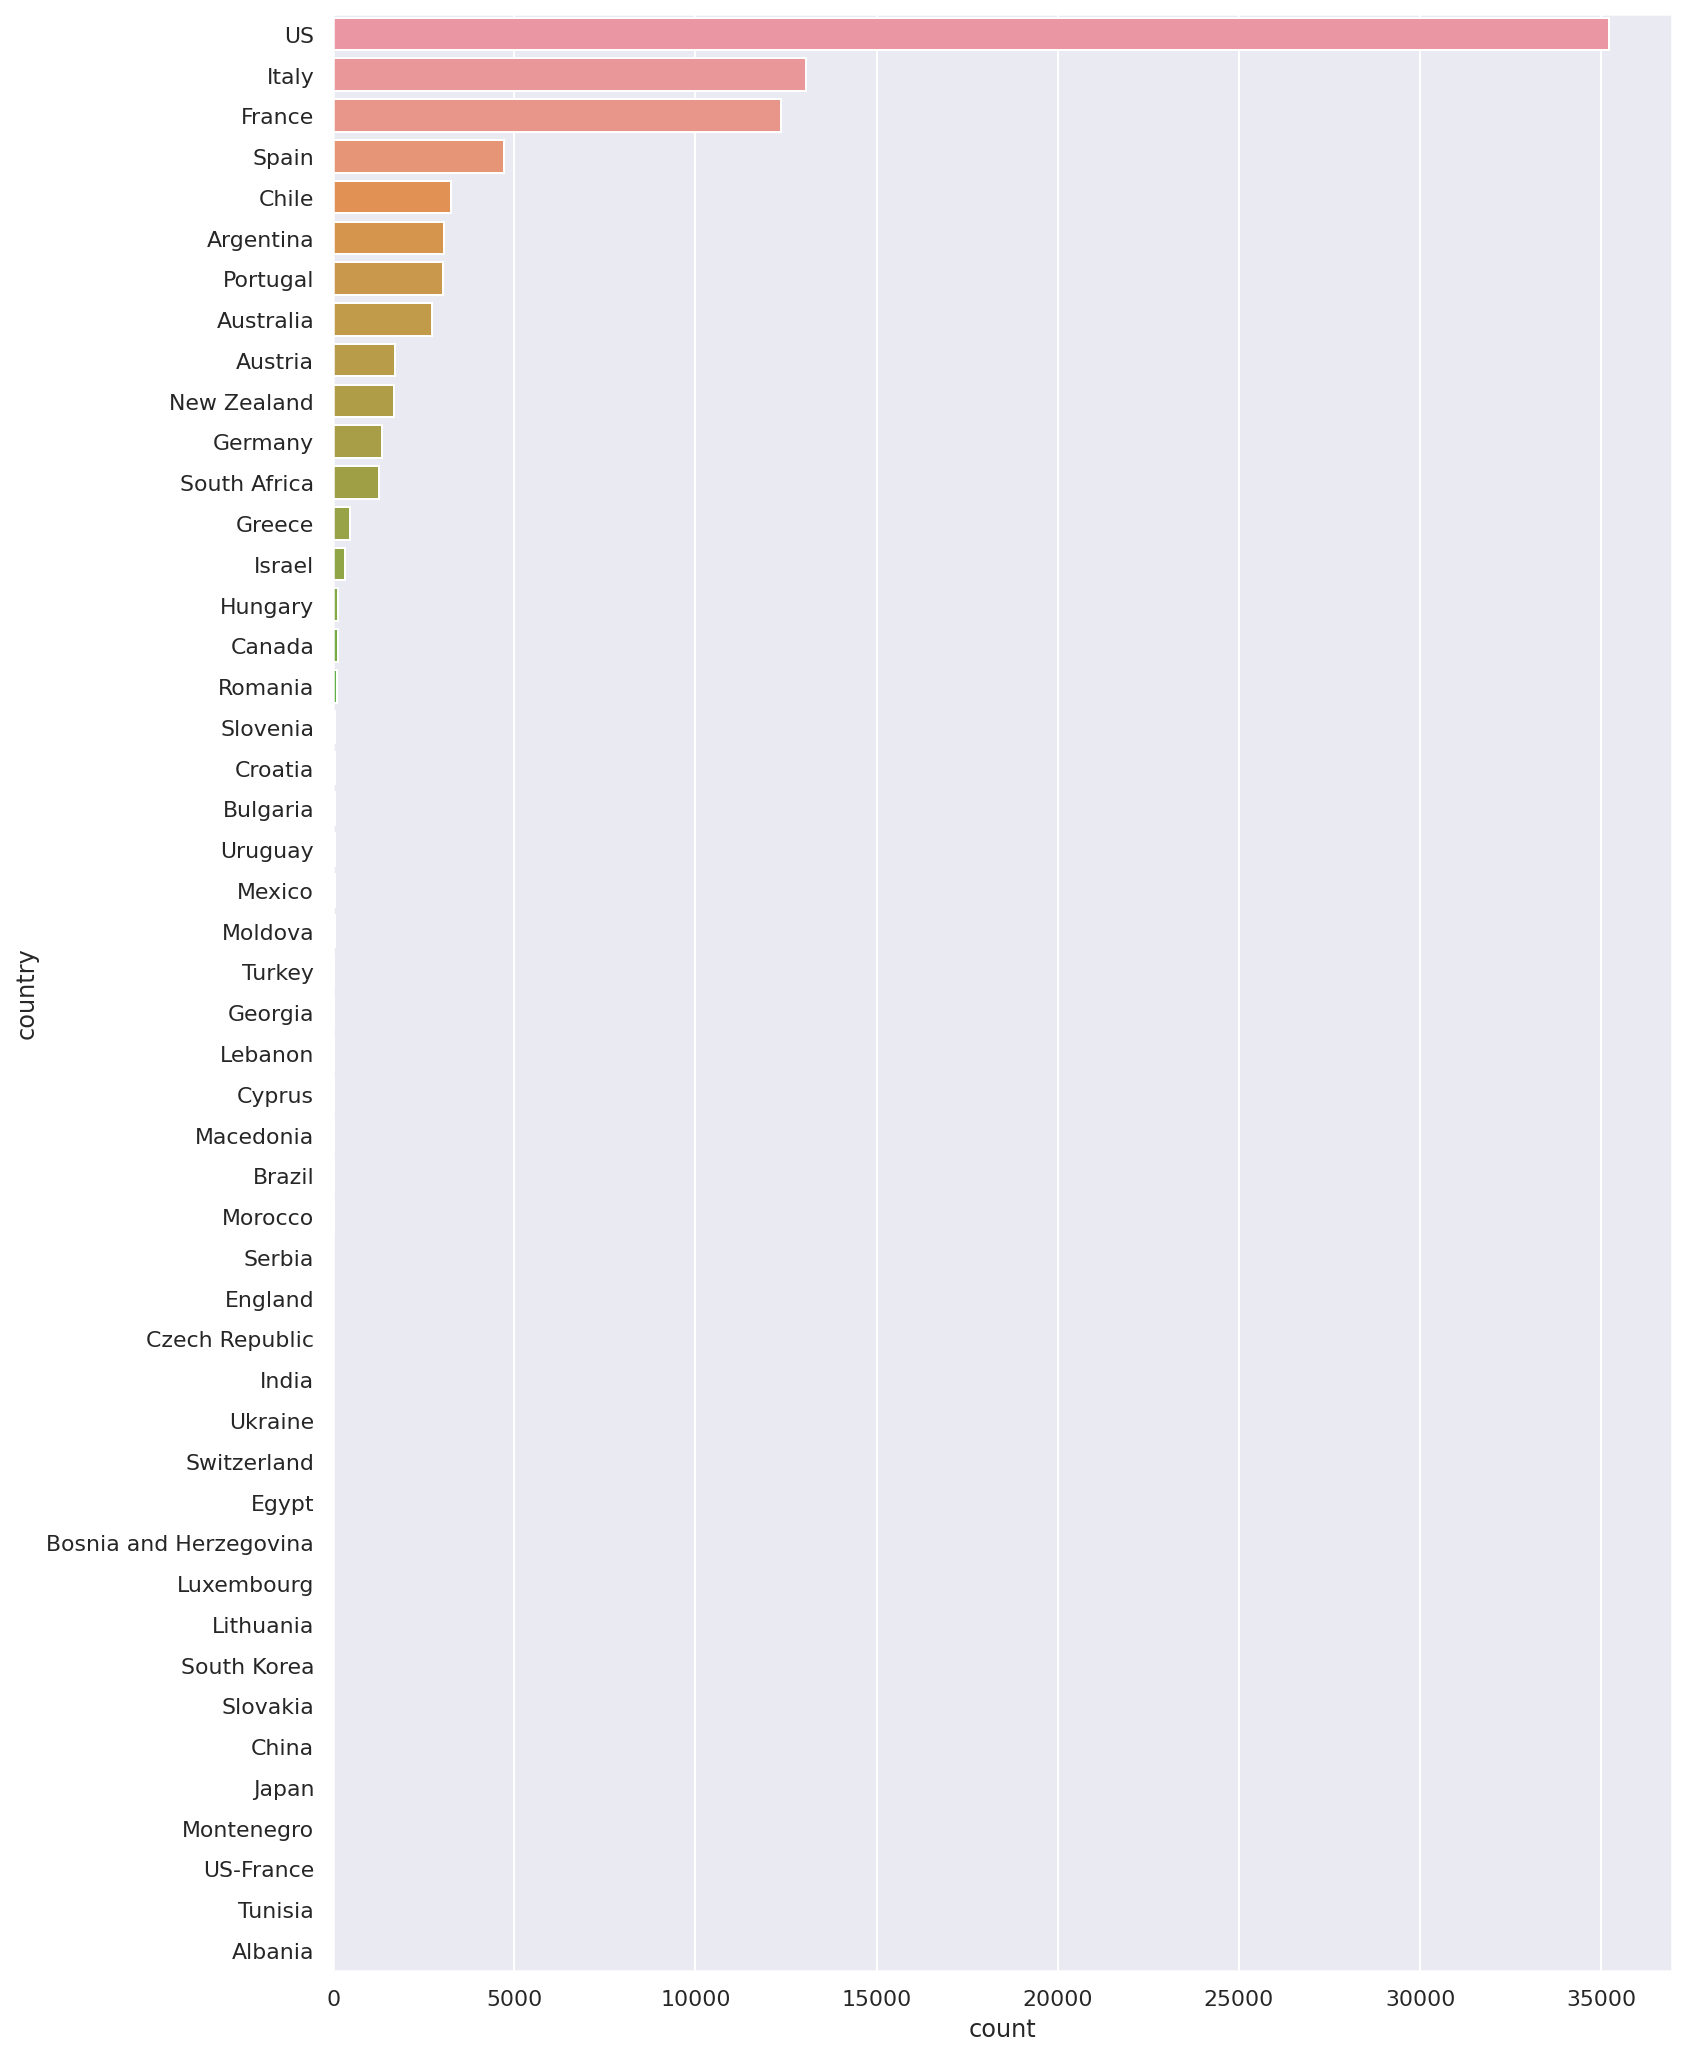

In [14]:
fig, ax = plt.subplots(figsize=(12, 18))
sns.countplot(ax=ax, data=df, y='country', order=df.country.value_counts().index)

## Description

In [15]:
df.iloc[:5].description.apply(print)
None

A creamed pear wine, with an attractive tang of orange zest. It is light, bright, vibrant, very fruity. The acidity does seem to be excessive, so give this wine a few months in bottle.
Simple and dry, this Cabernet has modest blackberry, tea and oak flavors. With its firm tannins, it gets the basic Cabernet job done.
This lovely wine captures the floral, perfumed essence of the grape in a restrained, sippable style. It's dry and crisp, with lemony fruit and the delicate sensation that you are drinking fresh flowers.
The aromas are the thing here, as so often with Touriga Nacional, keeping the soft tannins and ripe, sweet fruit buoyant and lively. There is acidity, but there's more, maybe too much, of blackberry jam flavor.
This is an interesting, outright strange wine that opens with a full golden color and an aromatic veil of smoke, dust or chalky mineral over exotic fruit and peach. One item out of place is the alcohol, which emerges strong in the mouth.


In [16]:
df.description.isna().sum()

0

In [17]:
import wordcloud

In [18]:
wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(df.description.str.cat())

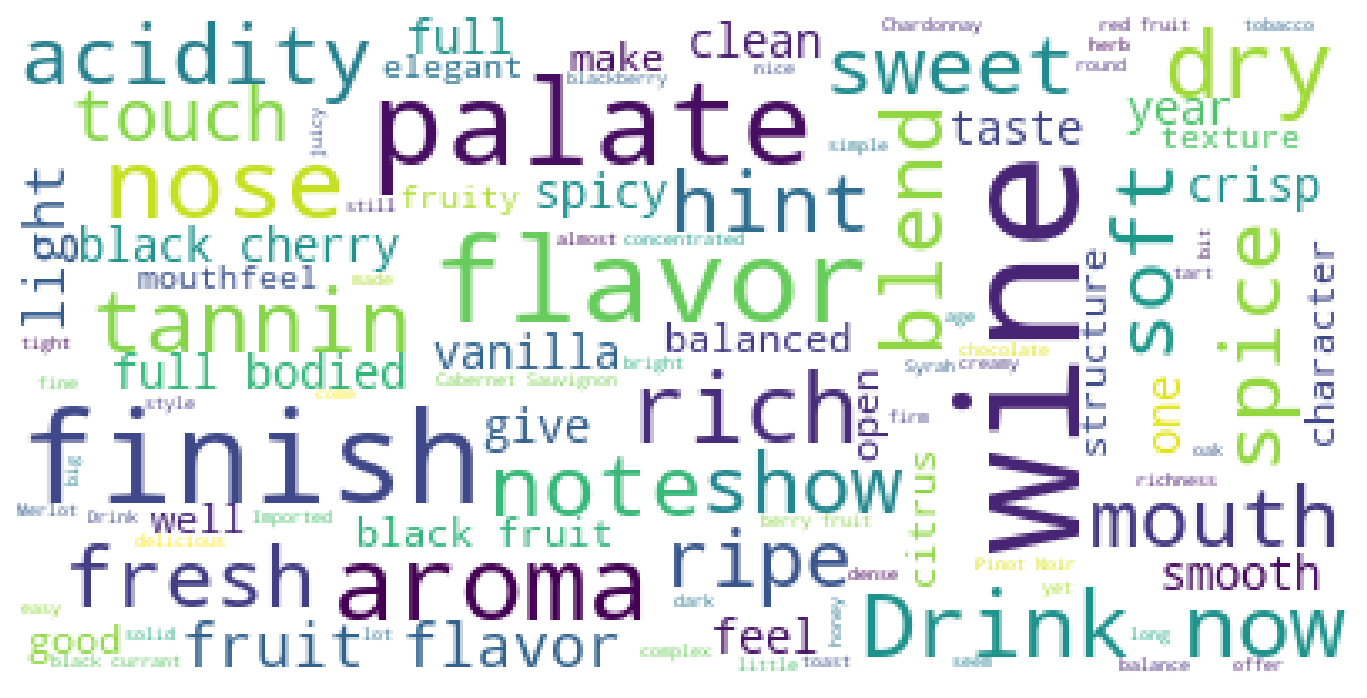

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(wc)
ax.set_axis_off()

In [53]:
df.description.size

85028

In [91]:
df.description.unique().size

85005

## Designation

In [22]:
df.designation[0]

'Brut Blanc de Blancs'

In [23]:
df.designation.isna().sum() / df.description.size

0.30512301829985417

In [24]:
df.designation.dropna().unique().size

27800

<AxesSubplot:>

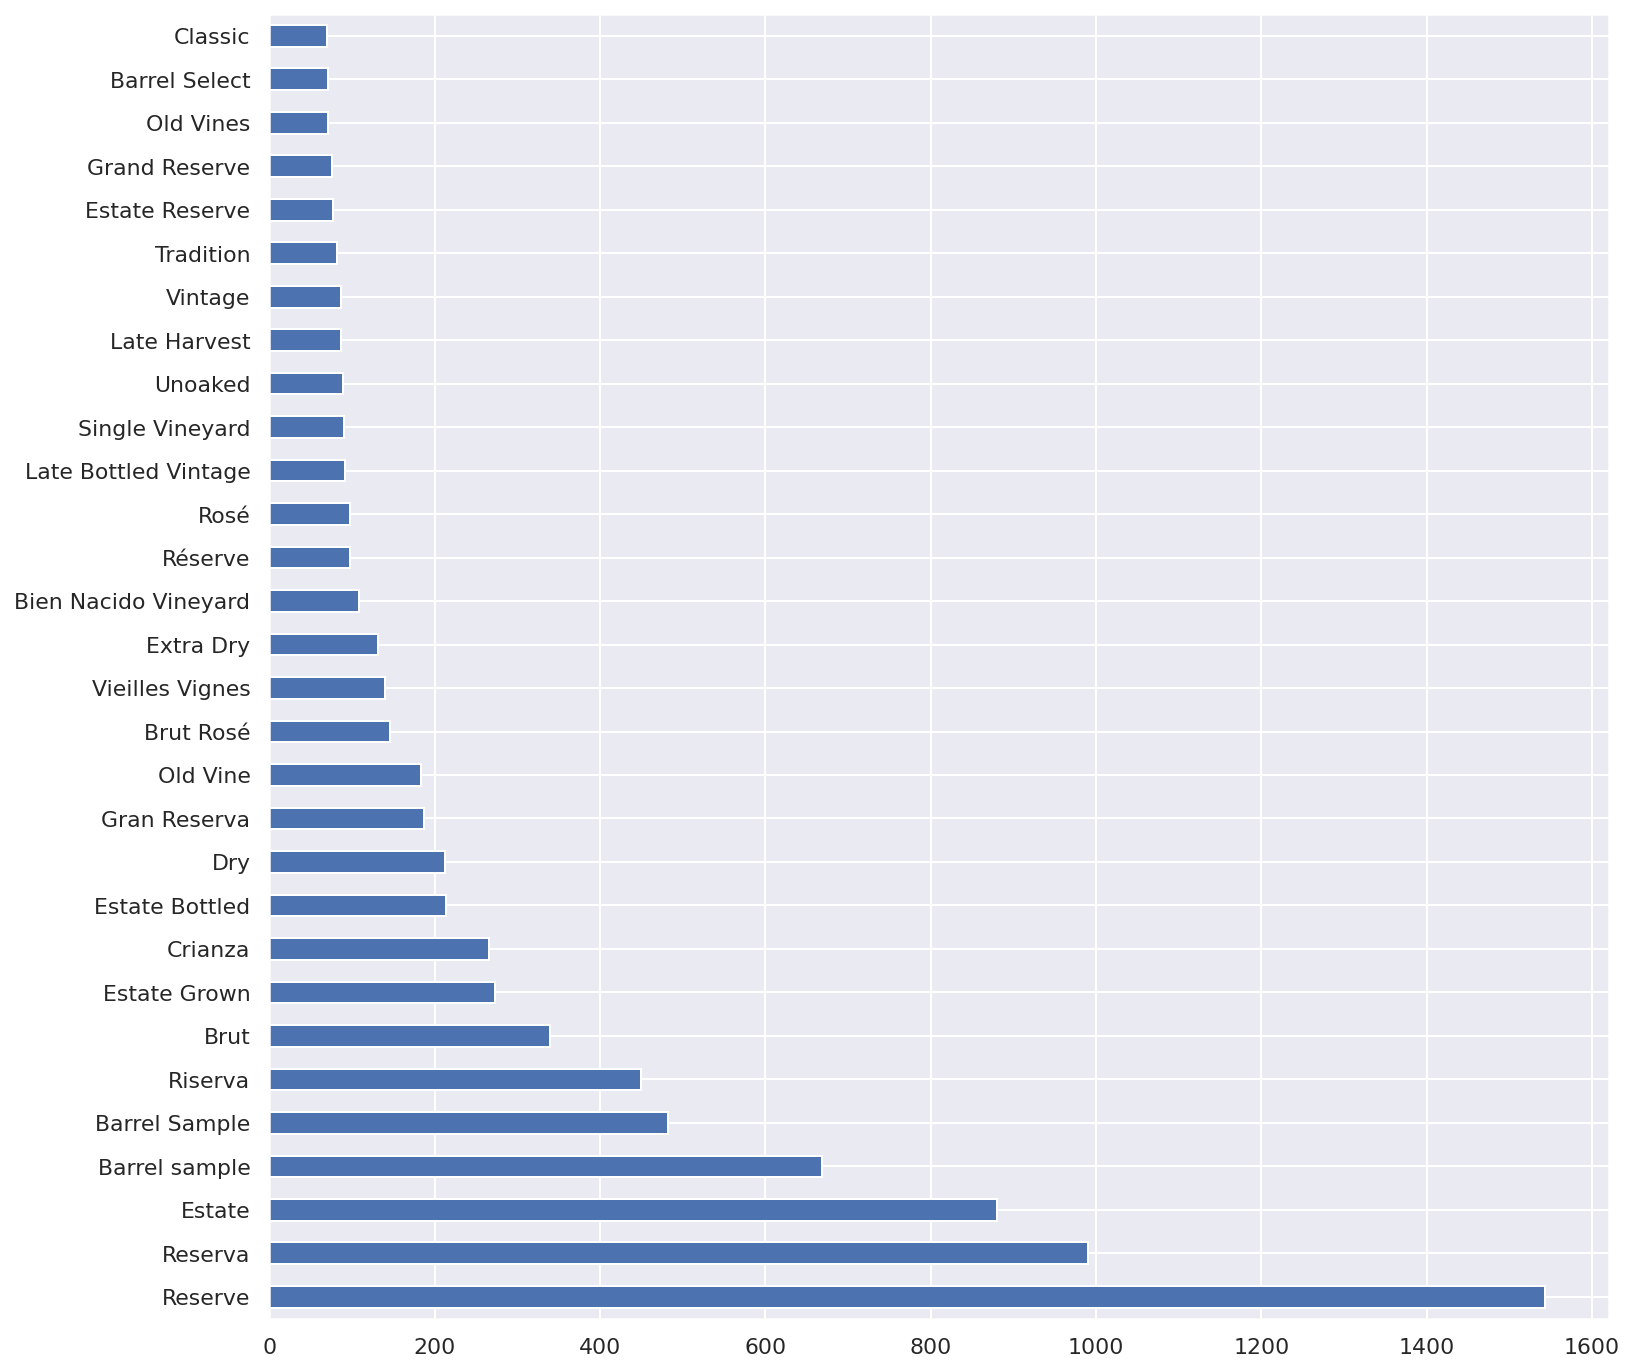

In [25]:
df.designation.dropna().value_counts()[:30].plot.barh(figsize=(12, 12))

<AxesSubplot:xlabel='quality', ylabel='designation'>

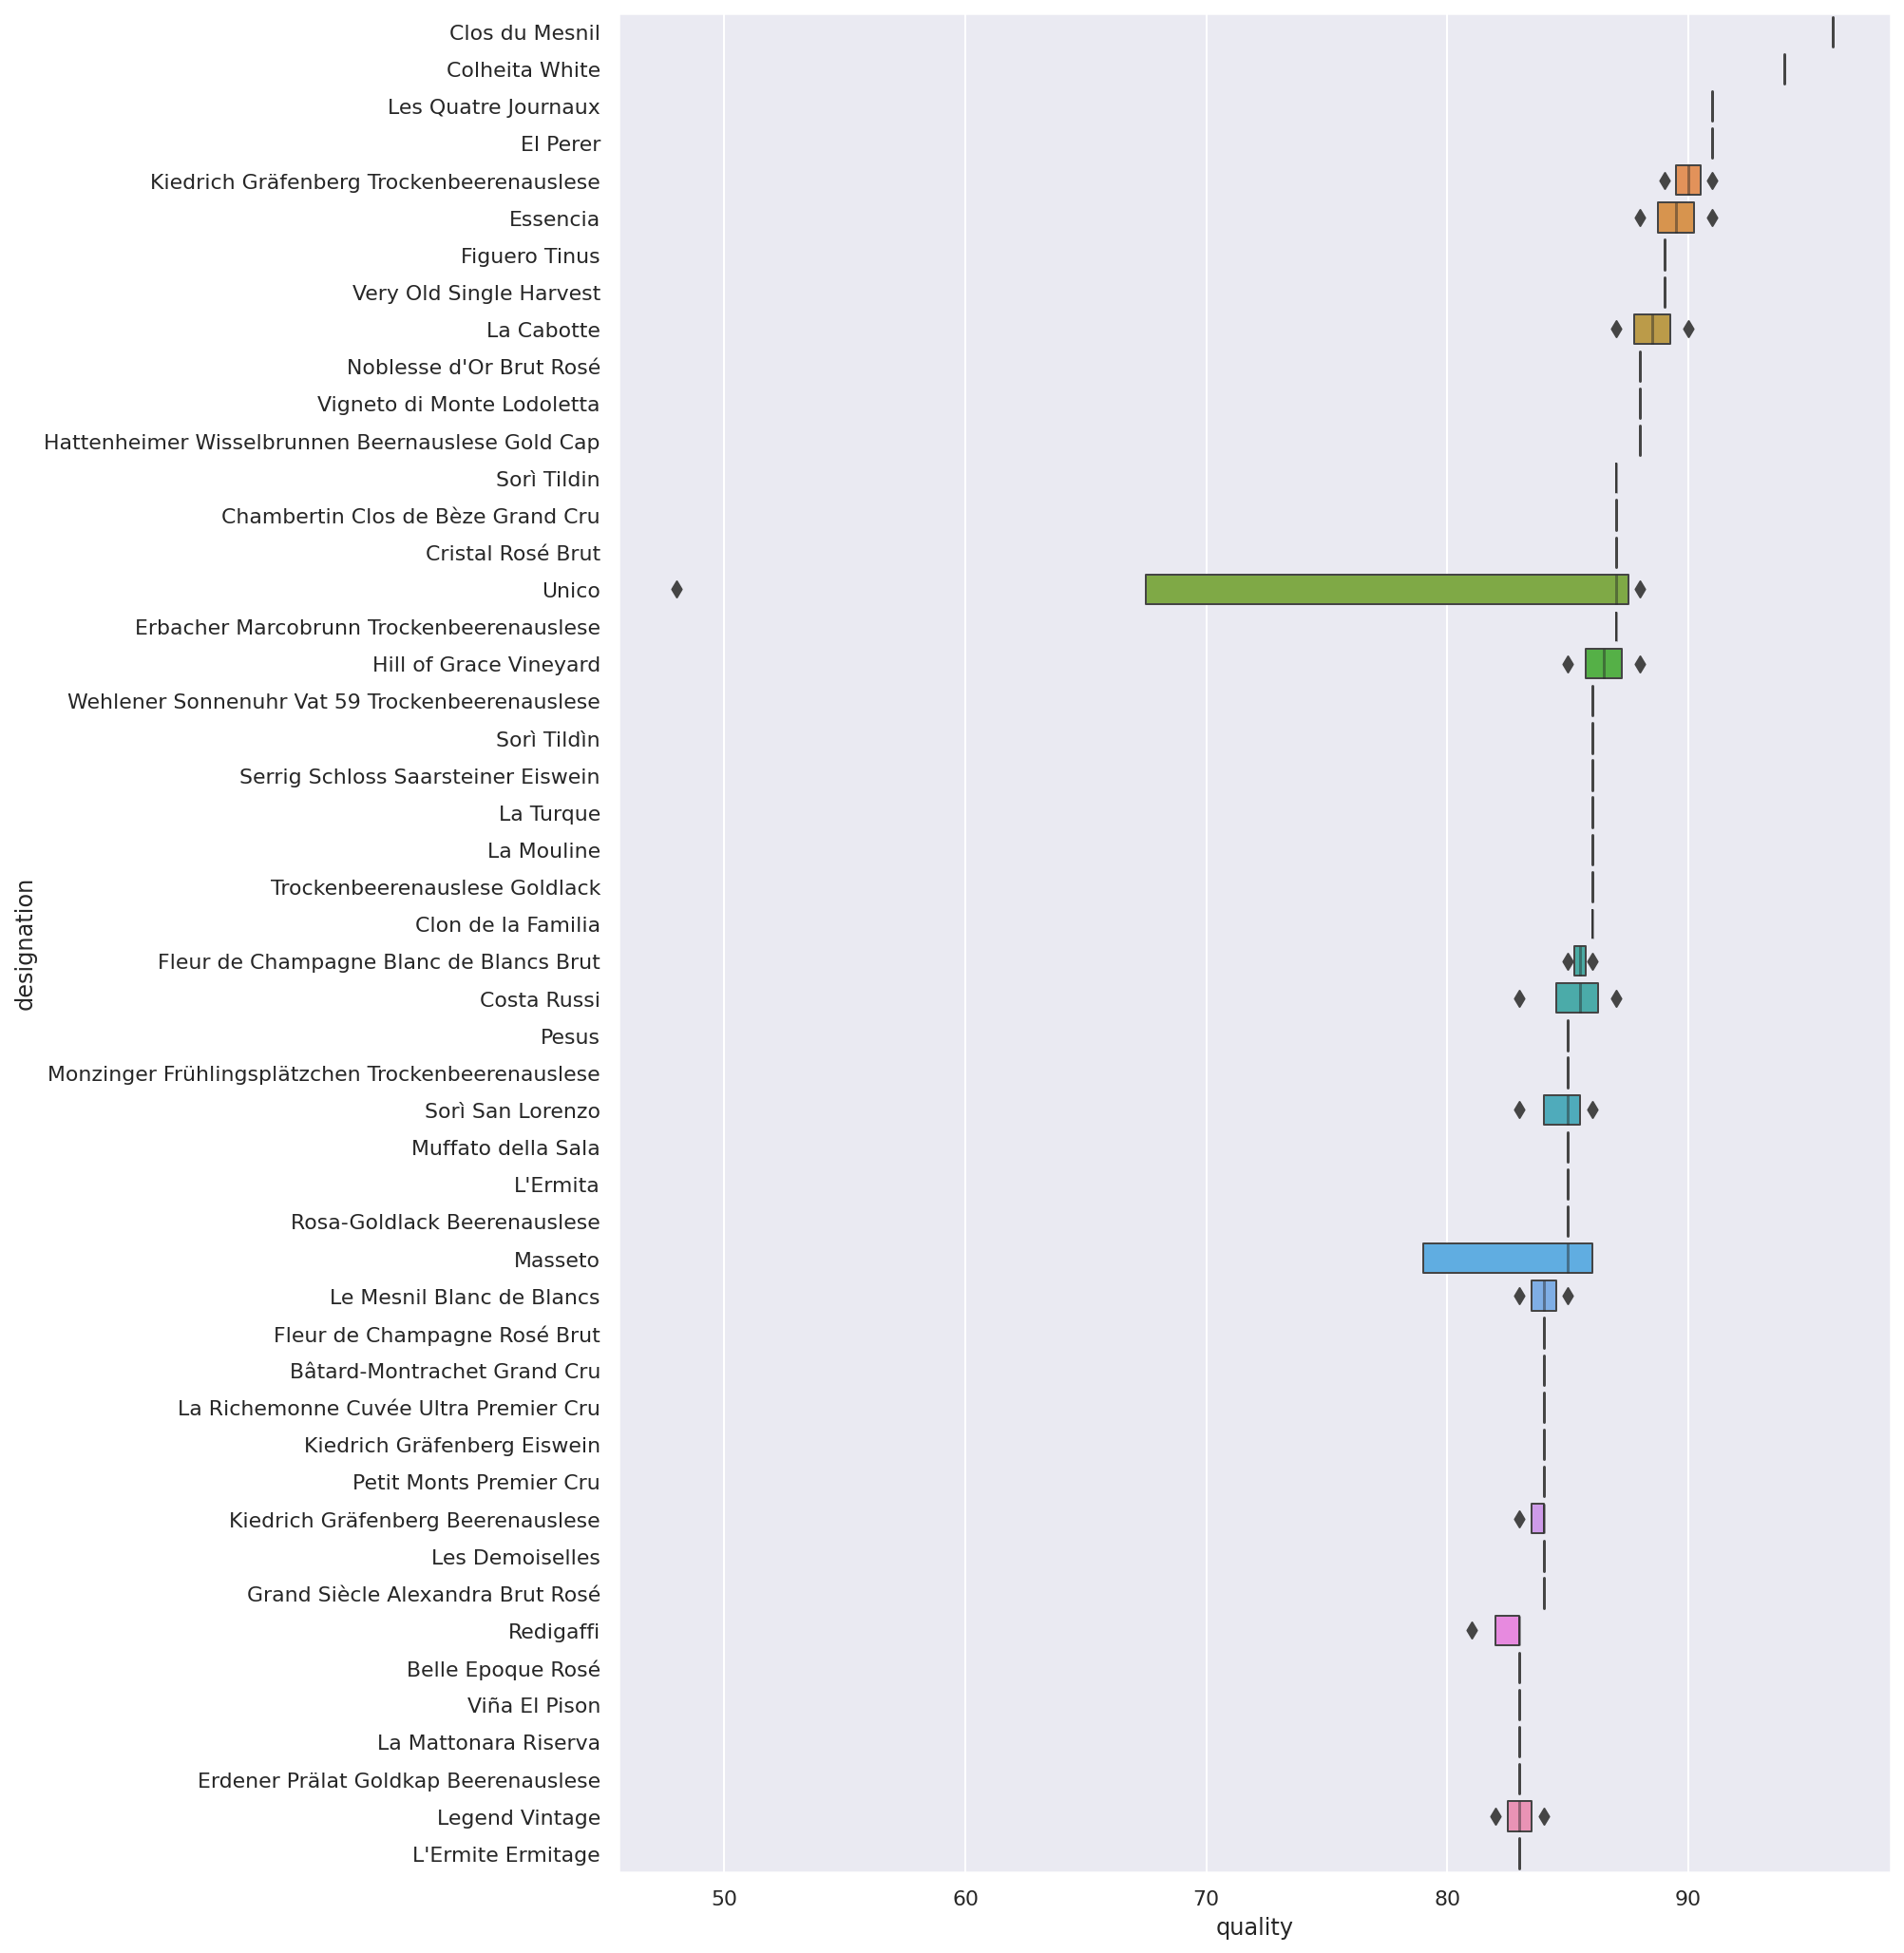

In [26]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='designation').quality.median().sort_values(ascending=False).iloc[:50].index
sns.boxenplot(ax=ax, data=df, x='quality', y='designation', order=order)

## Province

In [27]:
df.province[0]

'Alsace'

In [28]:
df.province.isna().sum()

3

In [29]:
df.province.unique().size

445

<AxesSubplot:xlabel='quality', ylabel='province'>

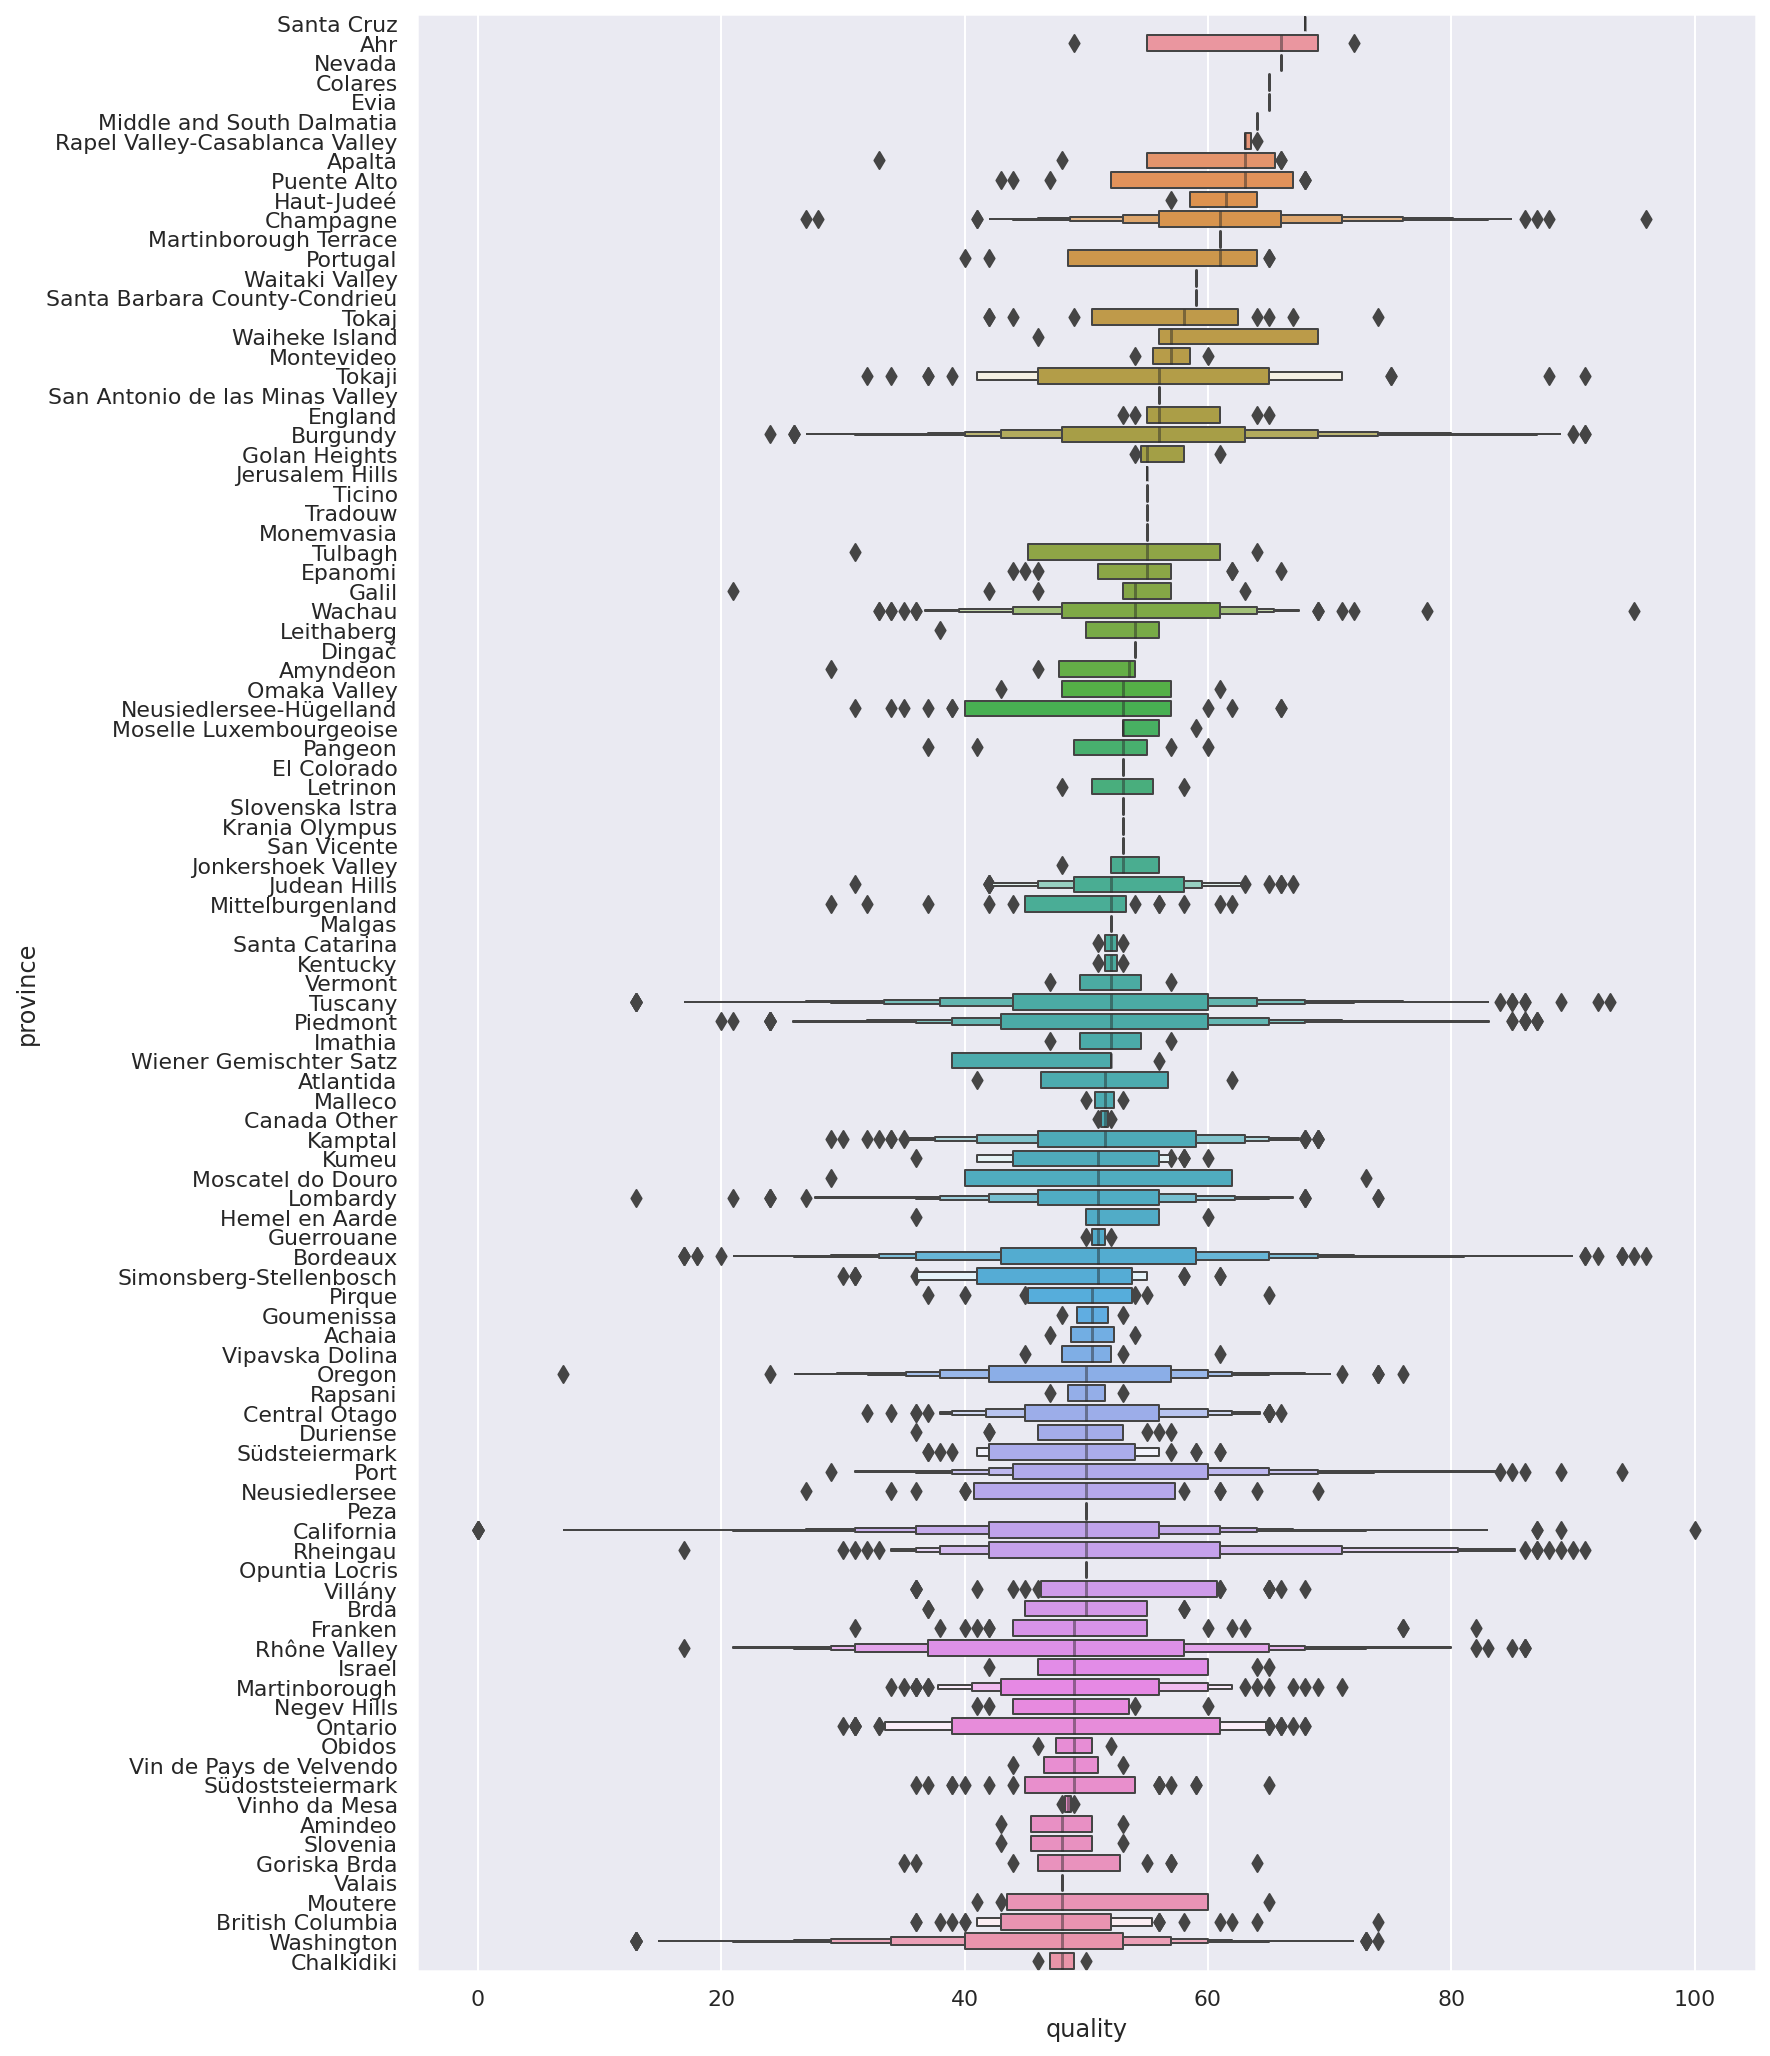

In [30]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='province').quality.median().sort_values(ascending=False).iloc[:100].index
sns.boxenplot(ax=ax, data=df, x='quality', y='province', order=order)

## Region 1

In [31]:
df.region_1[0]

"Crémant d'Alsace"

In [32]:
df.region_1.isna().sum() / df.description.size

0.16334619184268712

In [33]:
df.region_1.unique().size

1207

<AxesSubplot:xlabel='quality', ylabel='region_1'>

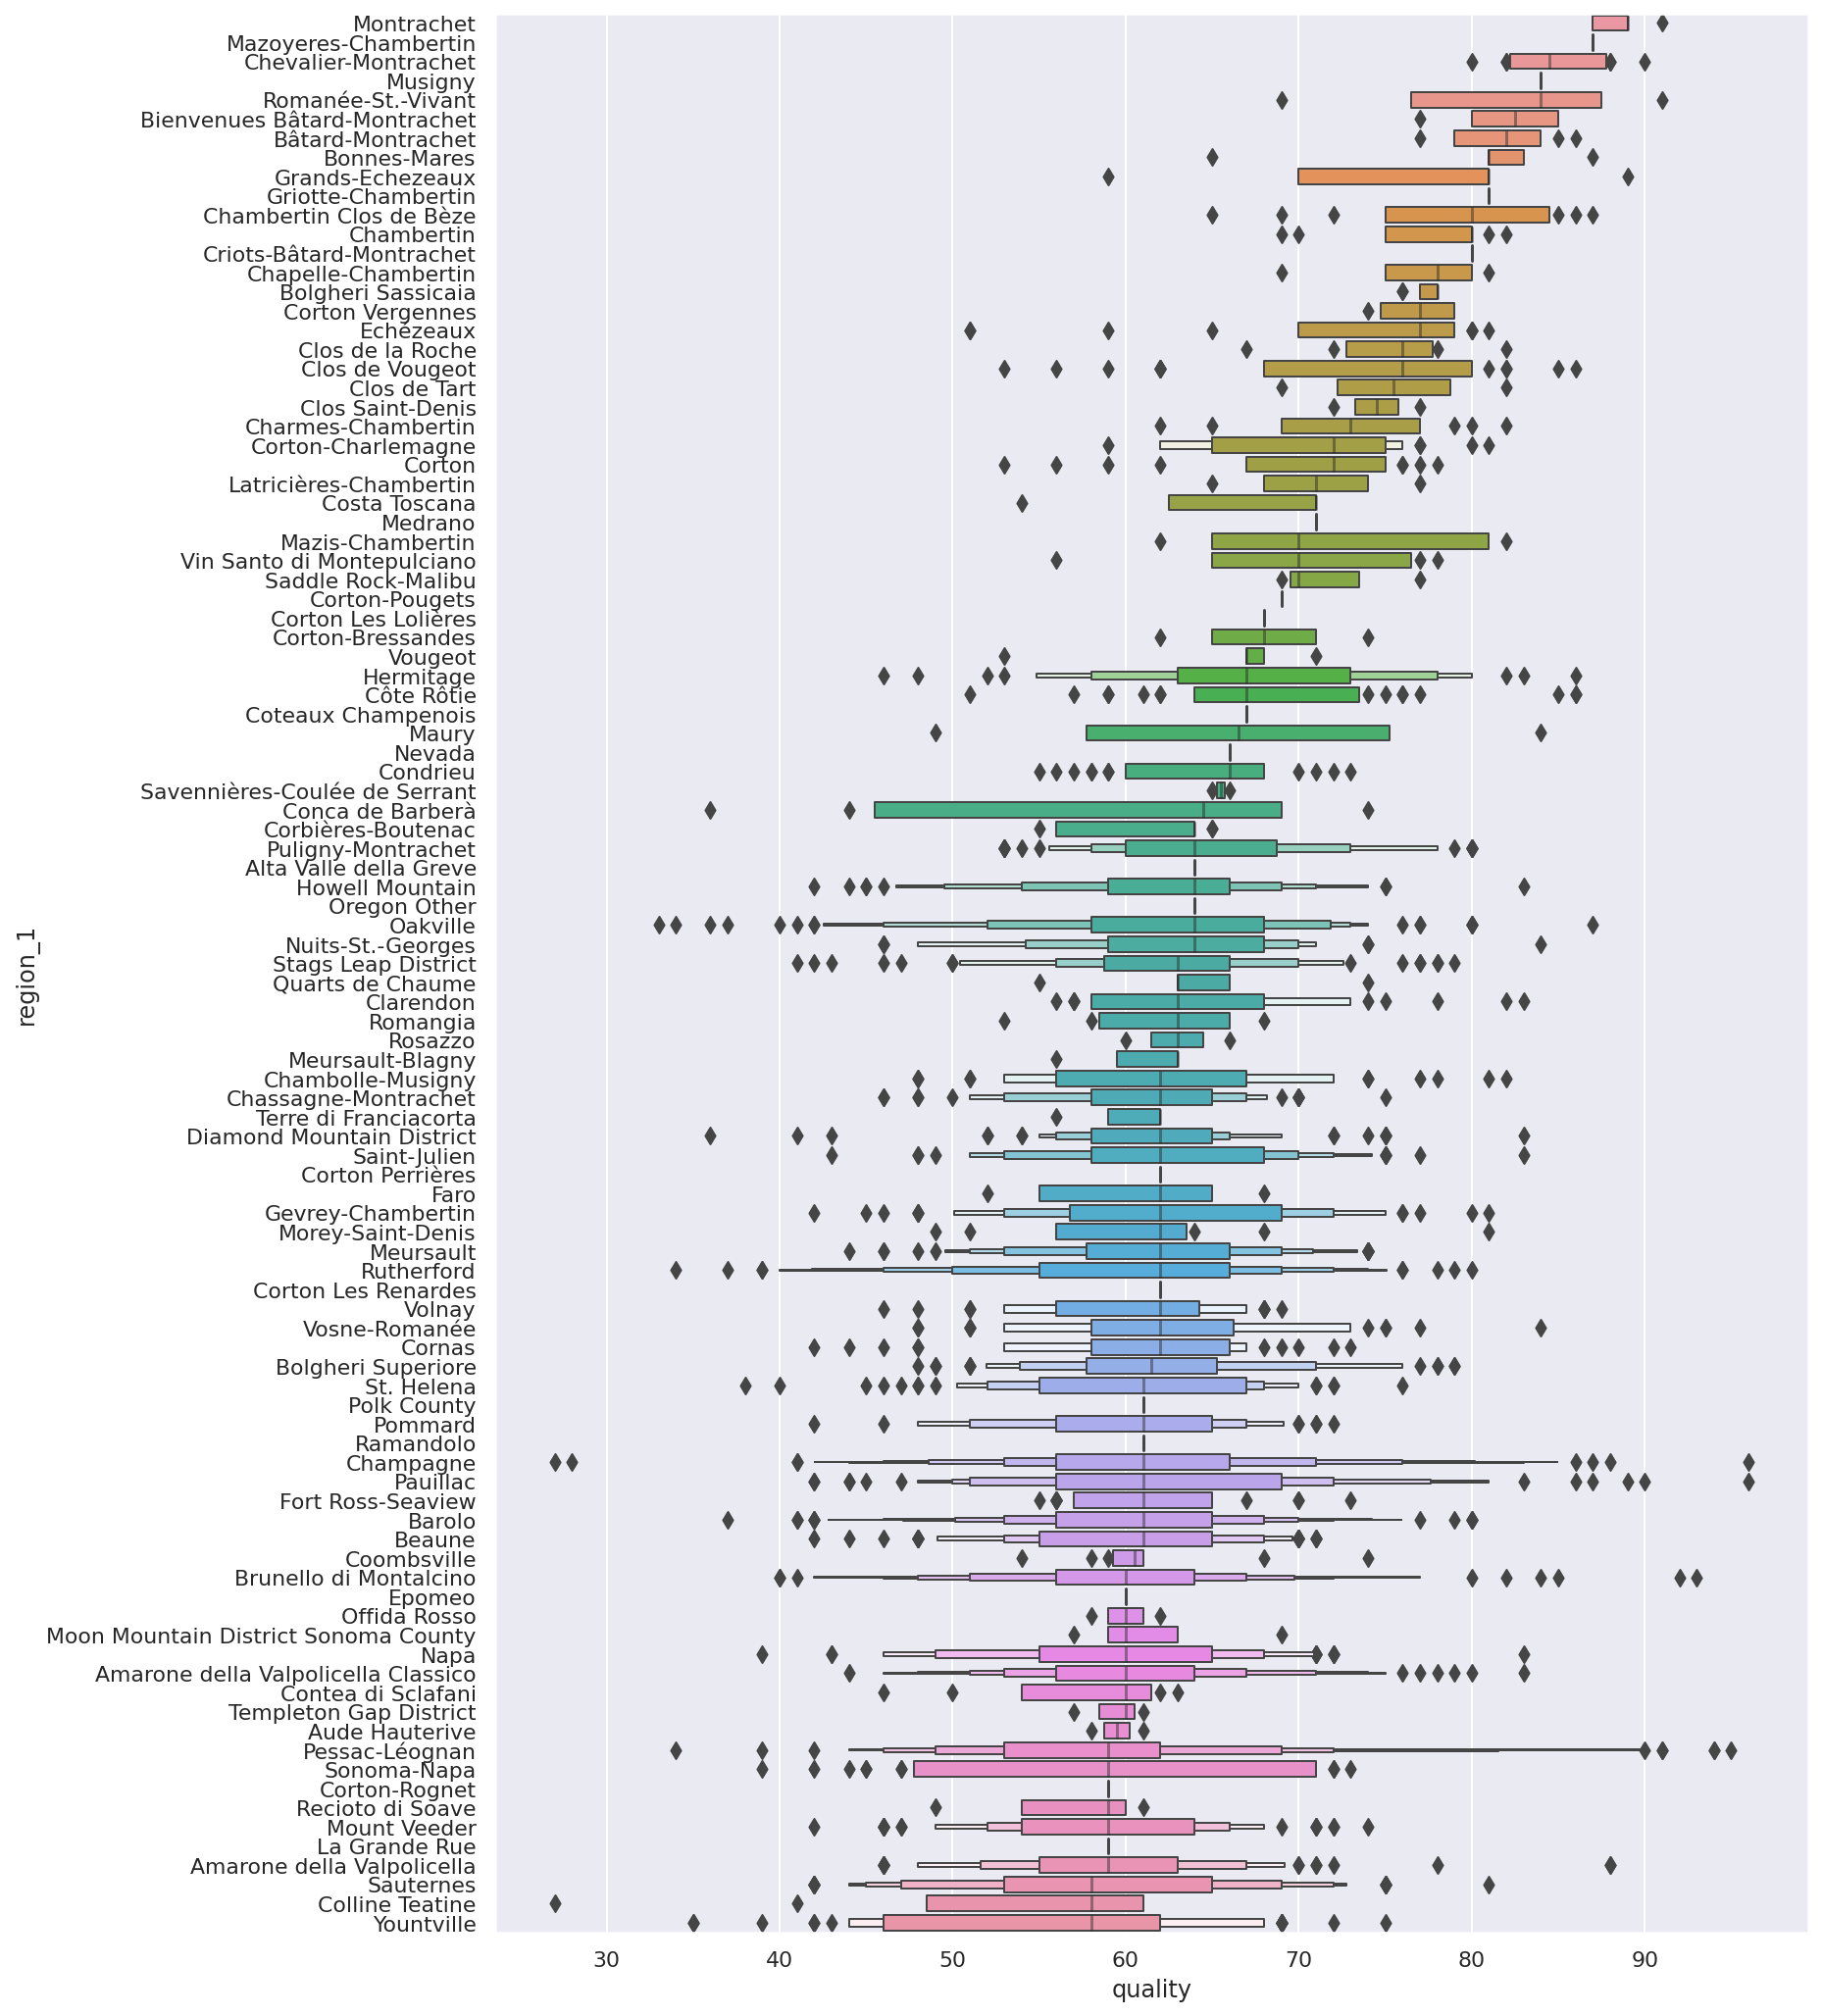

In [34]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='region_1').quality.median().sort_values(ascending=False).iloc[:100].index
sns.boxenplot(ax=ax, data=df, x='quality', y='region_1', order=order)

## Region 2

In [35]:
df.region_2[1]

'Central Coast'

In [36]:
df.region_2.isna().sum() / df.description.size

0.5966740367878817

In [37]:
df.region_2.unique().size

19

<AxesSubplot:xlabel='quality', ylabel='region_2'>

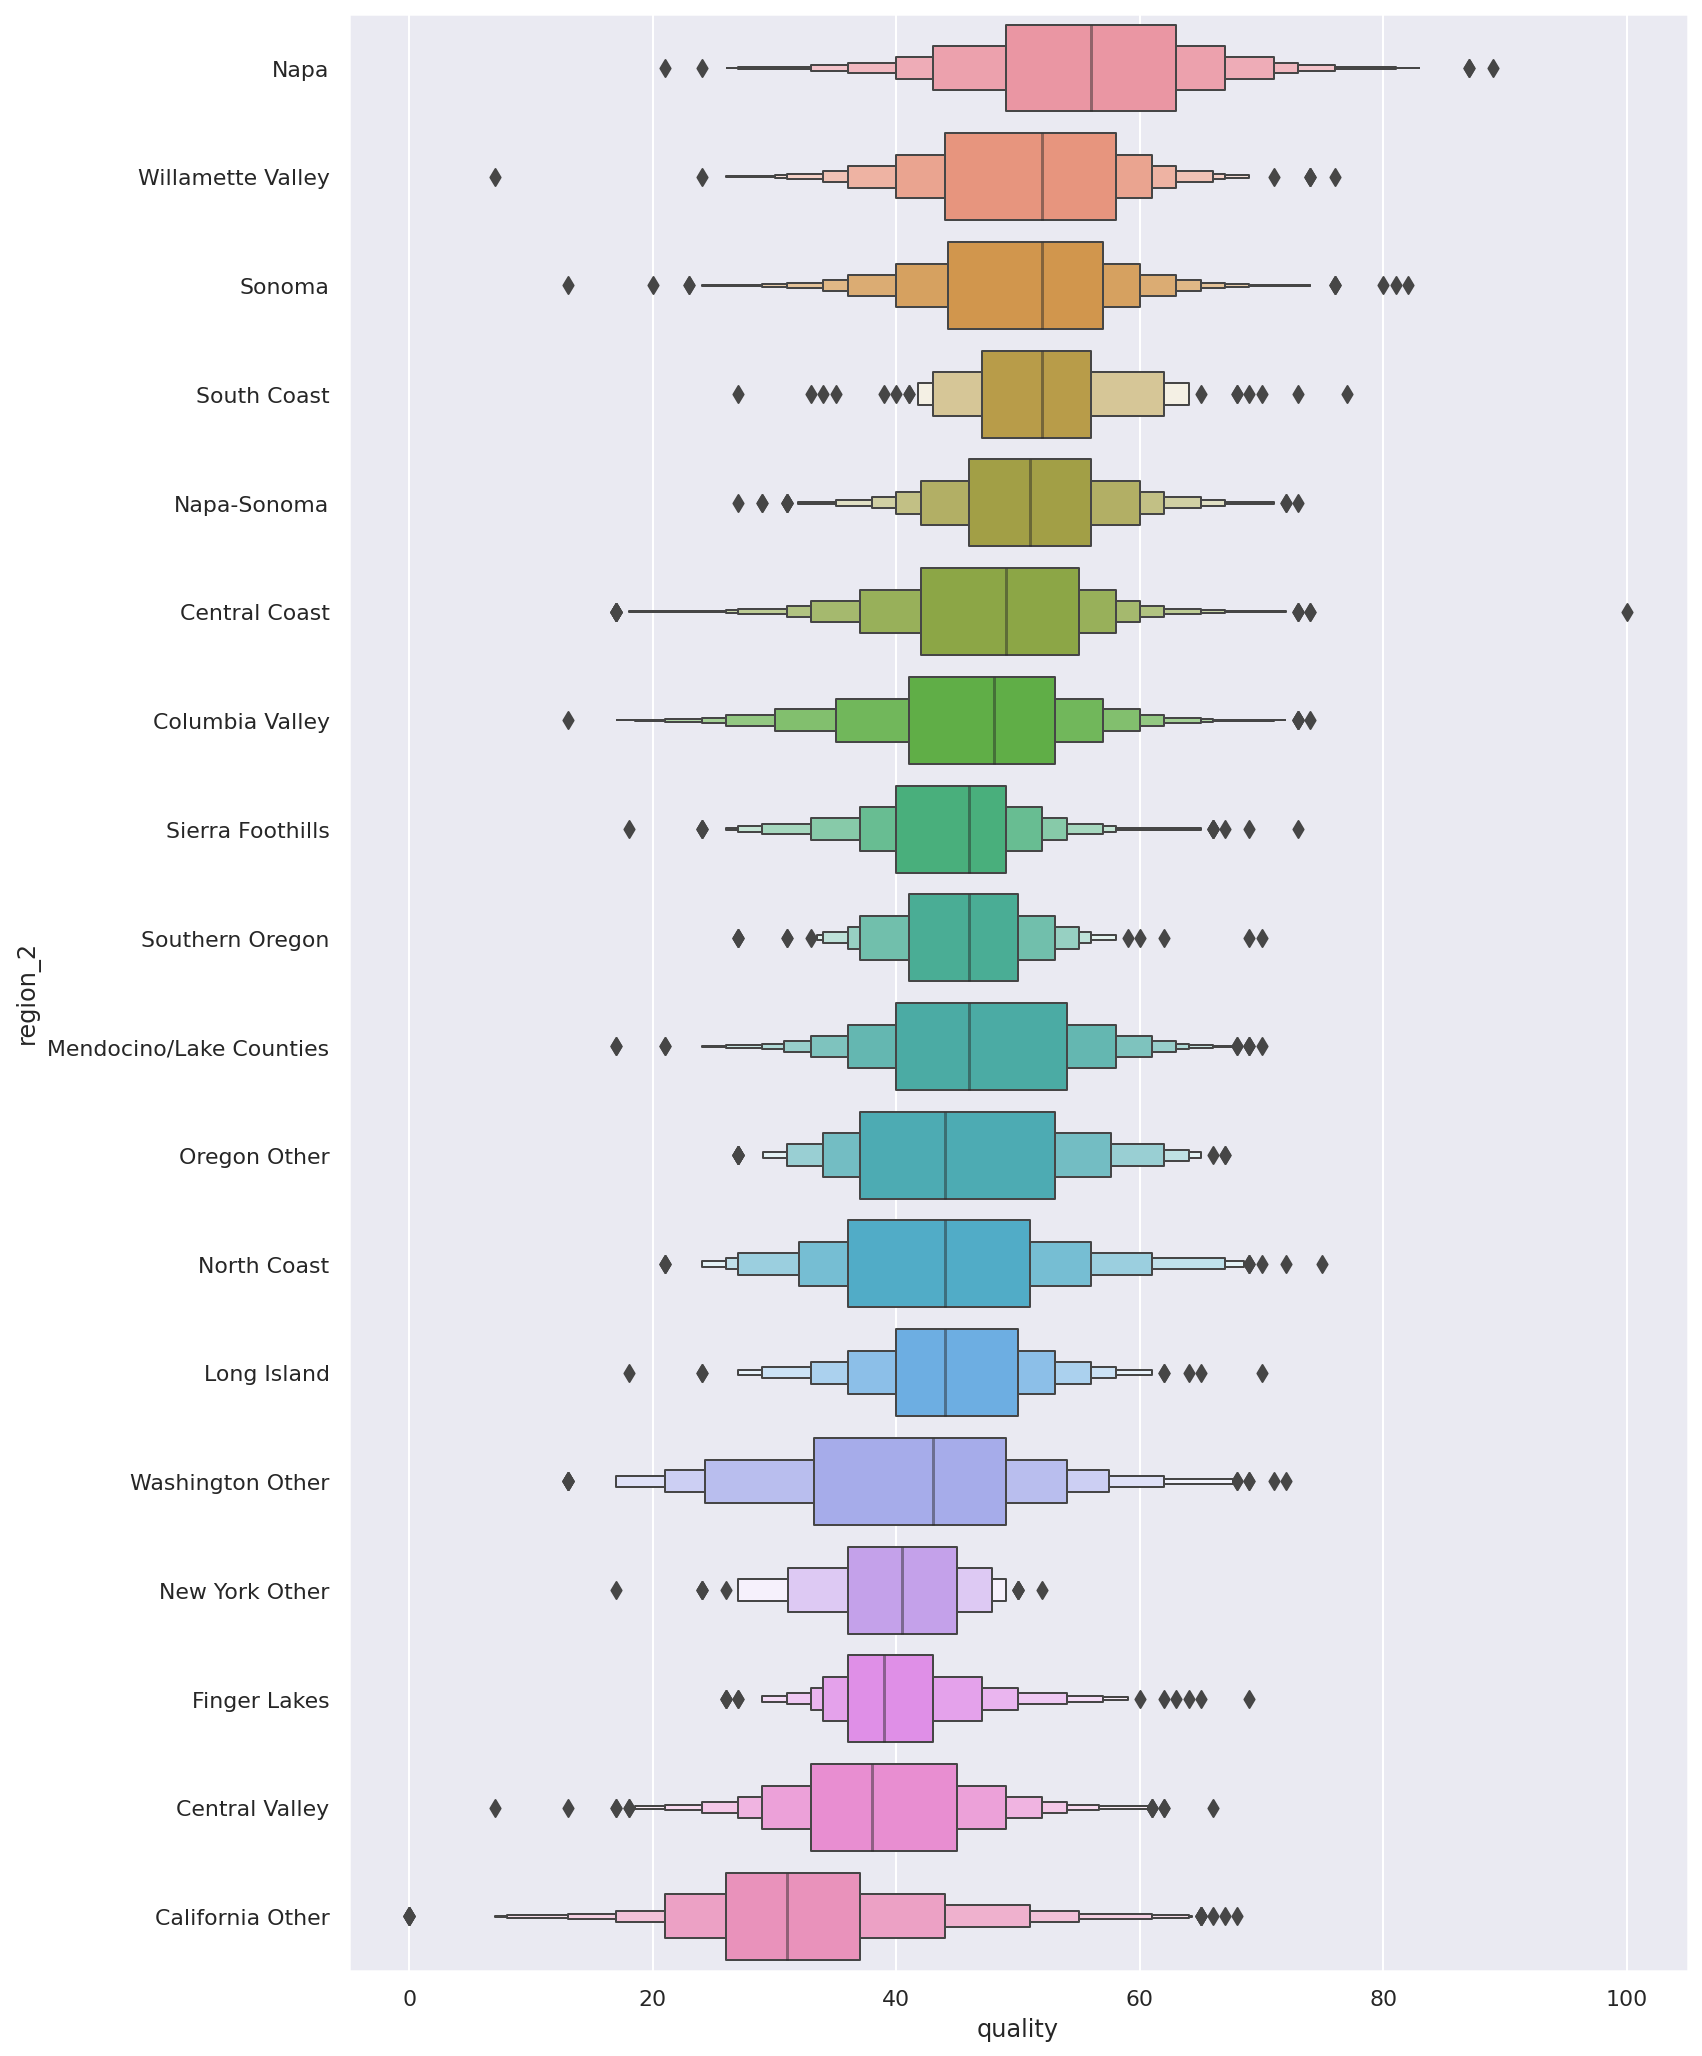

In [38]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='region_2').quality.median().sort_values(ascending=False).index
sns.boxenplot(ax=ax, data=df, x='quality', y='region_2', order=order)

## Variety

In [39]:
df.variety[0]

'Pinot Blanc'

In [40]:
df.variety.isna().sum()

0

In [41]:
df.variety.unique().size

603

<AxesSubplot:xlabel='quality', ylabel='variety'>

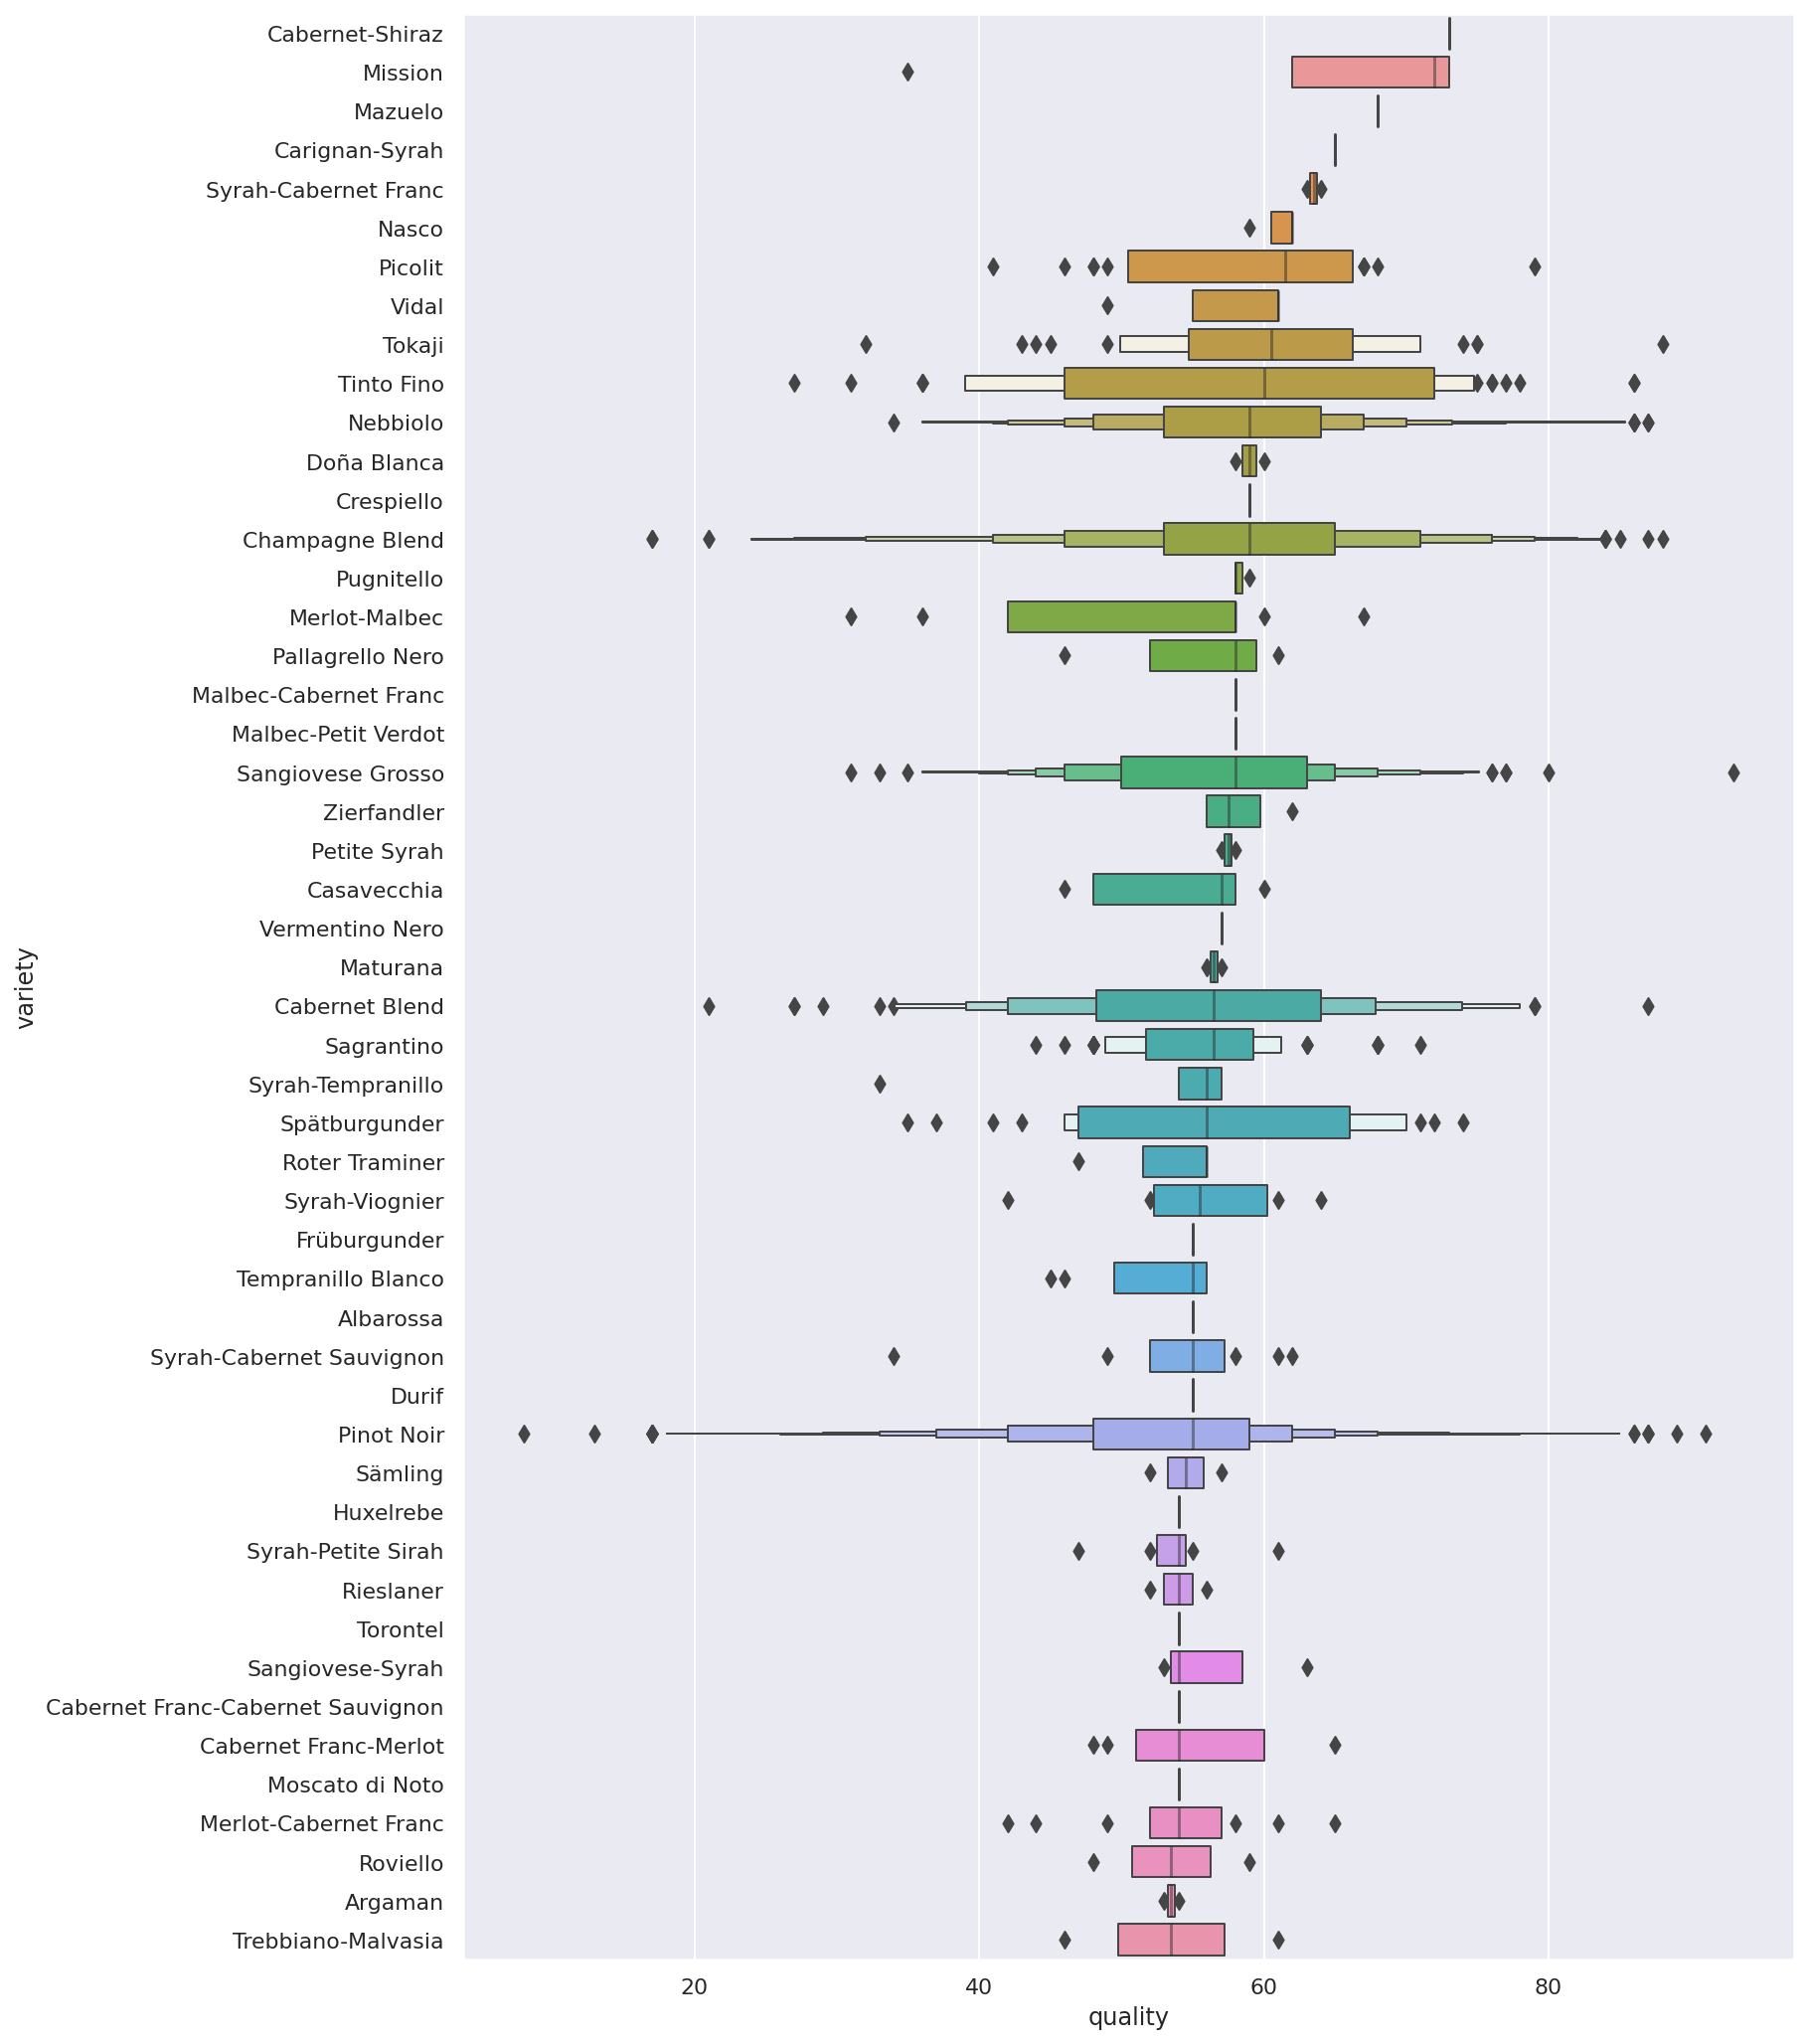

In [42]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='variety').quality.median().sort_values(ascending=False).iloc[:50].index
sns.boxenplot(ax=ax, data=df, x='quality', y='variety', order=order)

## Winery

In [43]:
df.winery[0]

'Lucien Albrecht'

In [44]:
df.winery.isna().sum()

0

In [45]:
df.winery.unique().size

14105

<AxesSubplot:xlabel='quality', ylabel='winery'>

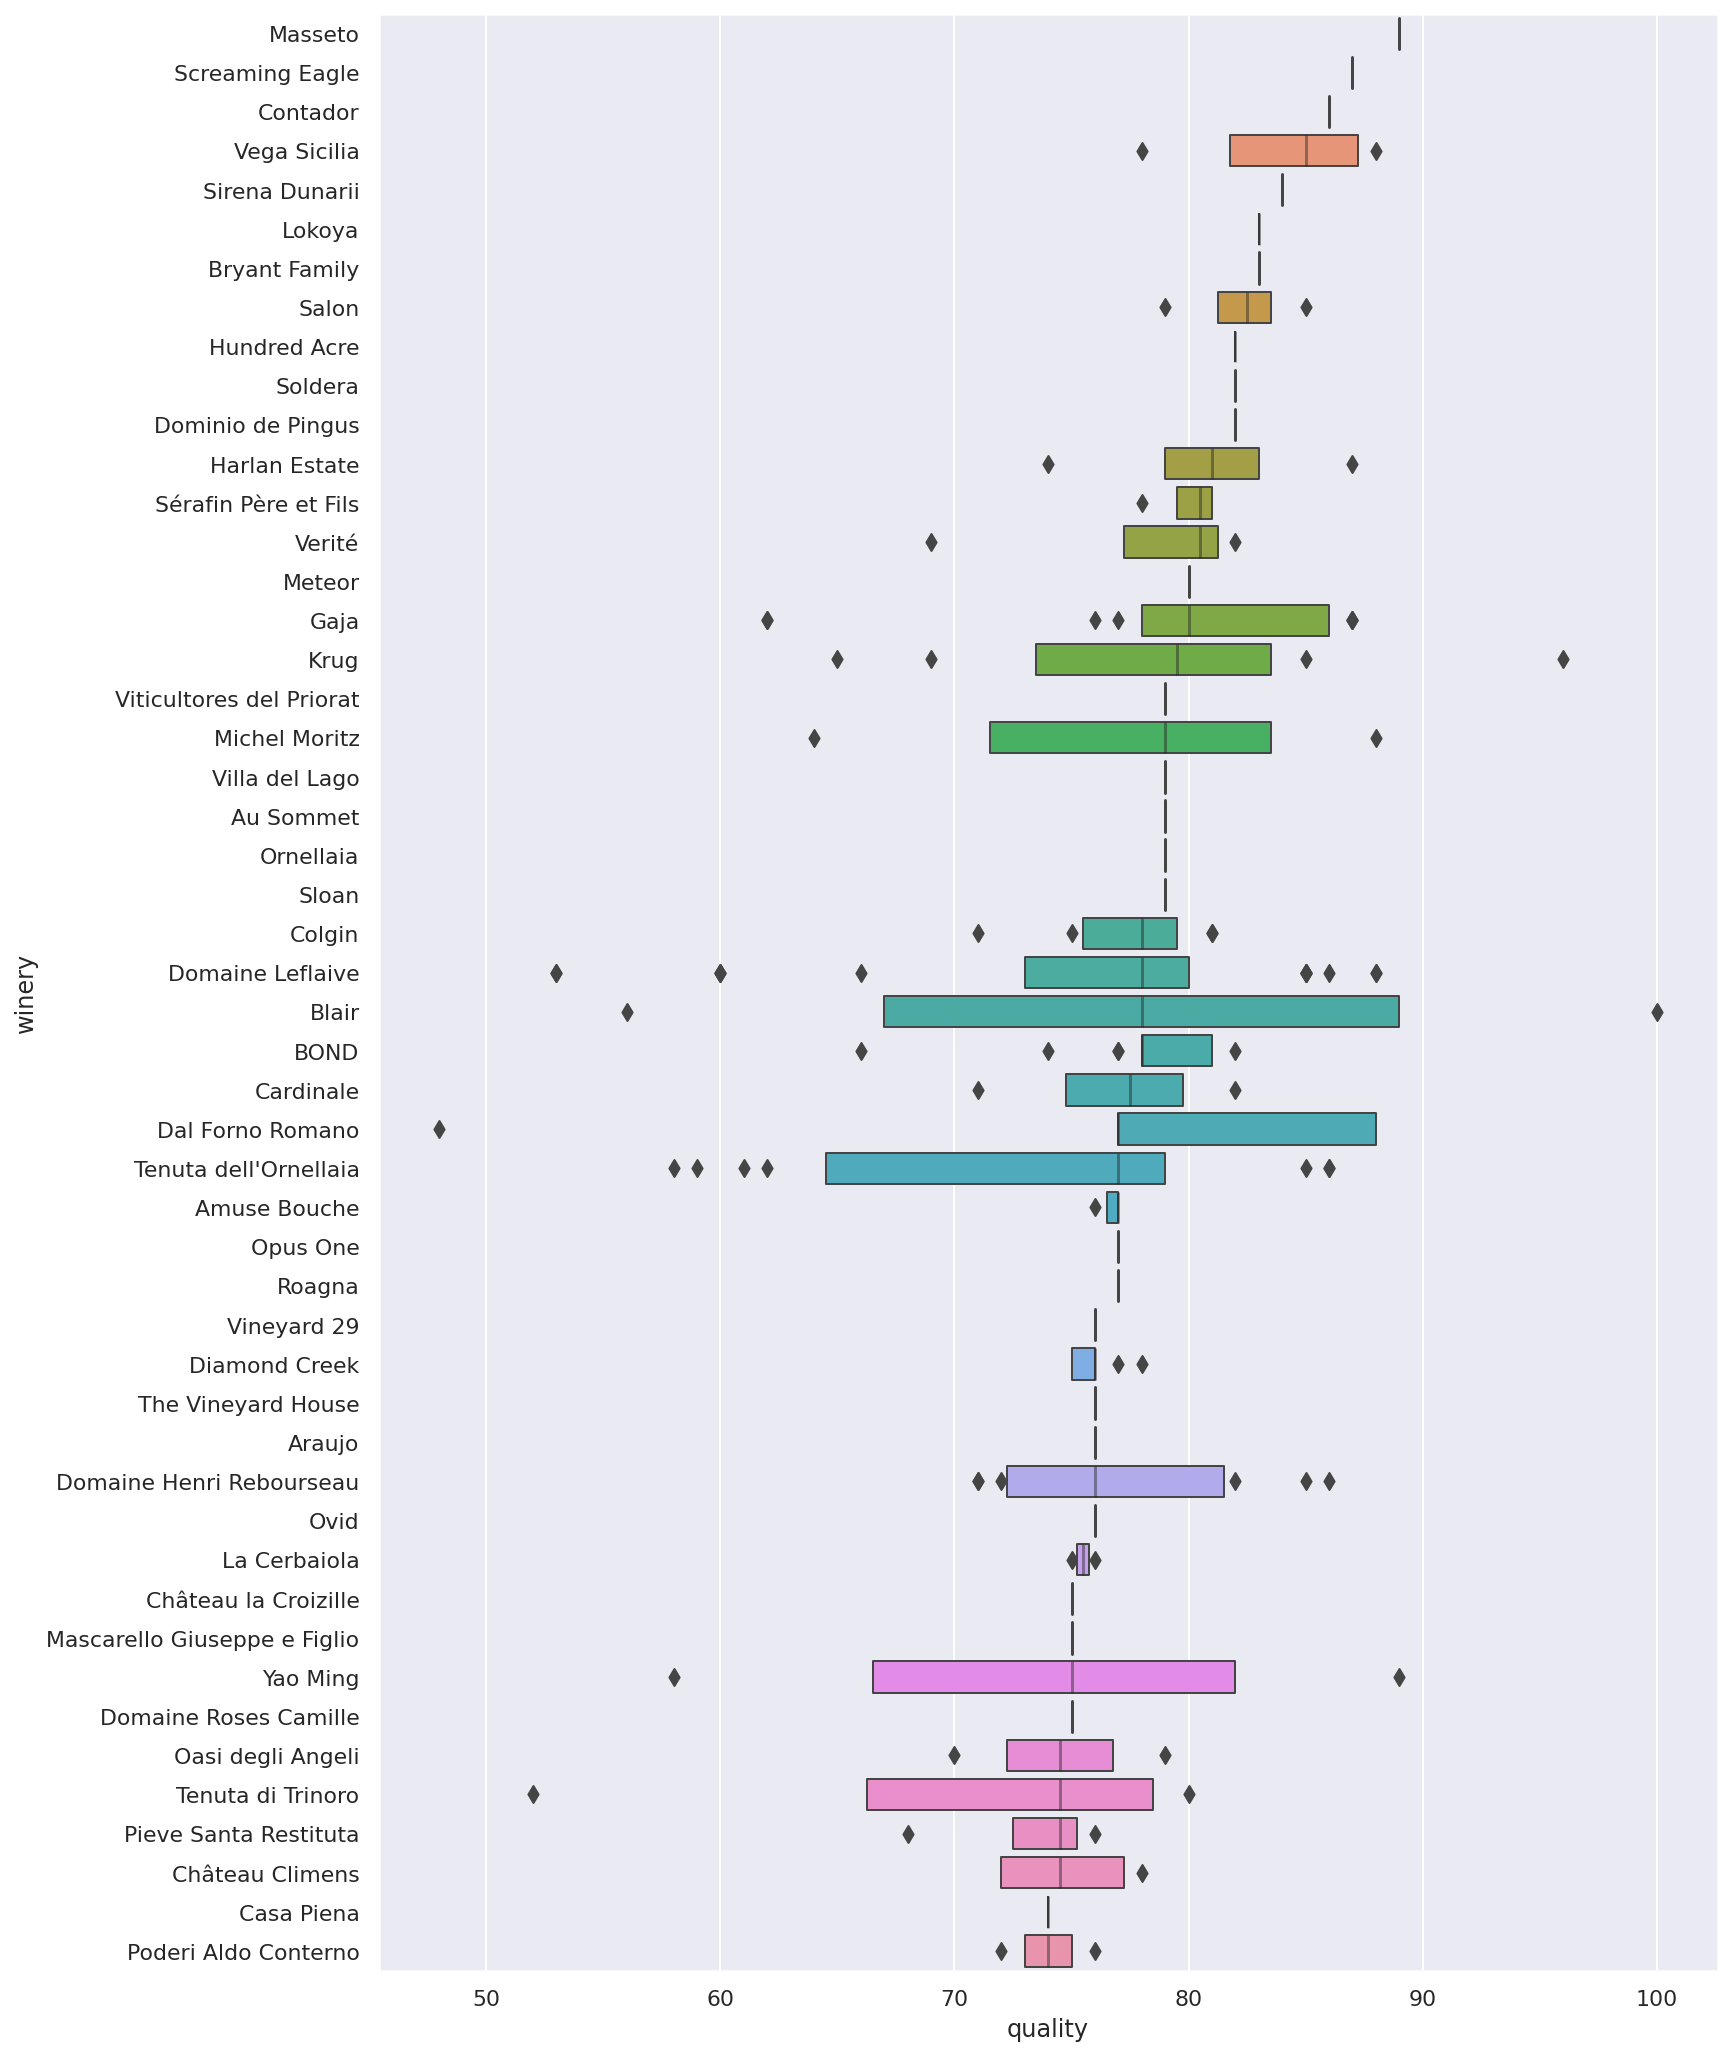

In [46]:
fig, ax = plt.subplots(figsize=(12, 18))
order = df.groupby(by='winery').quality.median().sort_values(ascending=False).iloc[:50].index
sns.boxenplot(ax=ax, data=df, x='quality', y='winery', order=order)

## Quality

In [47]:
df.quality[0]

45.0

In [48]:
df.quality.describe()

count    85028.000000
mean        46.422614
std         11.935714
min          0.000000
25%         38.000000
50%         46.000000
75%         55.000000
max        100.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='Density'>

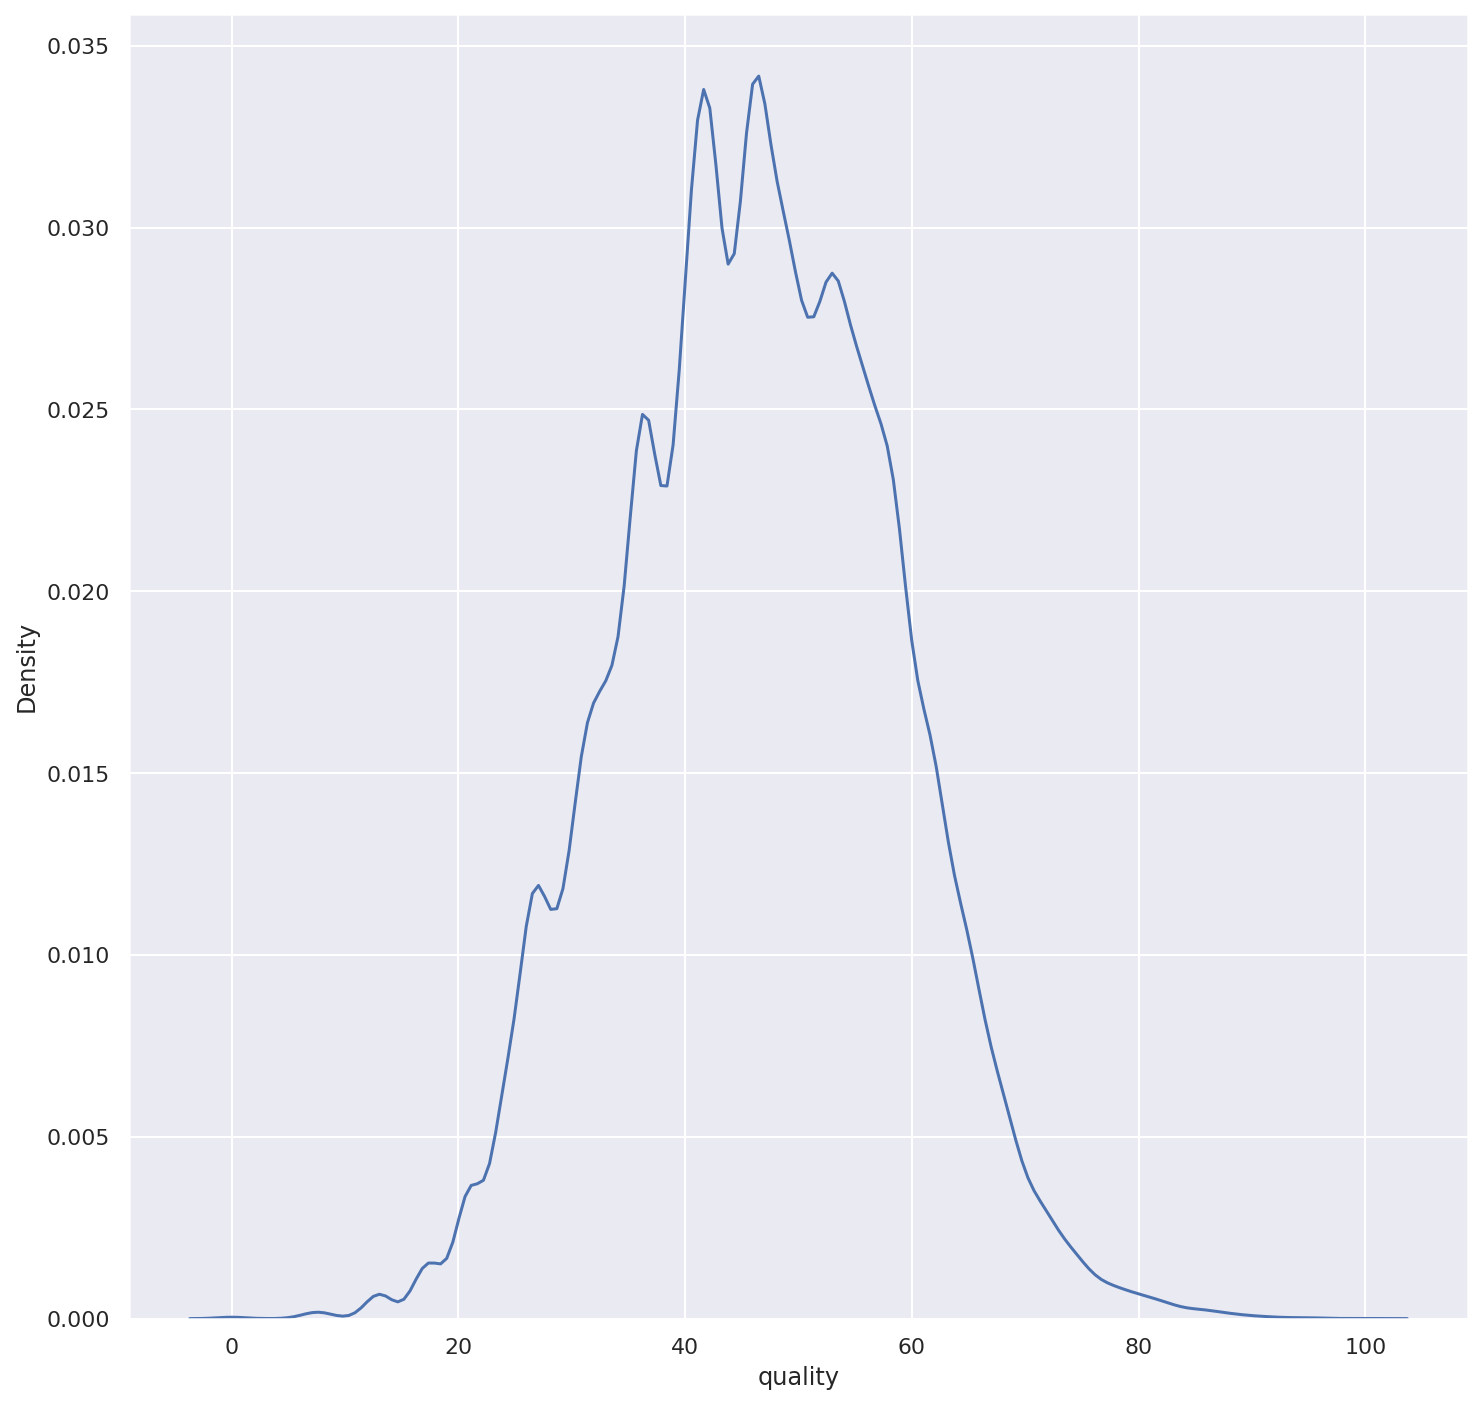

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.kdeplot(ax=ax, data=df, x='quality')

## Understanding the hierarchy in the features

In [50]:
df.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


In [105]:
df.country.value_counts().cumsum().iloc[14] / df.index.size

0.9917203744648821